# Chapter 7: Descriptive Statistics

*Mathematics for Psychologists and Computation*

Welcome to Chapter 7! In this chapter, we'll explore descriptive statistics, which are methods for summarizing and describing data. Descriptive statistics are fundamental in psychological research, allowing us to make sense of our observations and communicate findings effectively. We'll learn how to calculate and interpret various measures, visualize distributions, and understand the characteristics of our data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Set a clean visual style for our plots with grid turned off
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off
plt.rcParams['figure.dpi'] = 300  # Ensure grid is turned off for all plots

## Introduction to Descriptive Statistics

Descriptive statistics help us summarize and describe the main features of a dataset without making inferences or predictions. They provide a way to present quantitative descriptions in a manageable form and are essential for:

1. **Data exploration**: Understanding the basic properties of your data
2. **Data cleaning**: Identifying potential errors or outliers
3. **Data presentation**: Communicating findings clearly and concisely
4. **Data preparation**: Setting the stage for inferential statistics

In psychology, descriptive statistics are used to summarize experimental results, questionnaire responses, behavioral observations, and many other types of data. They help researchers understand patterns, trends, and relationships in their data before making broader inferences.

## Types of Data

Before diving into descriptive statistics, it's important to understand the different types of data we might encounter in psychological research:

1. **Nominal data**: Categorical data with no inherent order (e.g., gender, ethnicity, experimental condition)
2. **Ordinal data**: Categorical data with a meaningful order but no consistent interval between values (e.g., Likert scales, education level)
3. **Interval data**: Numerical data with consistent intervals but no true zero point (e.g., temperature in Celsius, IQ scores)
4. **Ratio data**: Numerical data with consistent intervals and a true zero point (e.g., reaction time, age, count data)

The type of data determines which descriptive statistics and visualizations are appropriate. Let's create some example datasets to work with:

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Example 1: Depression scores (interval data)
# Simulating Beck Depression Inventory scores (0-63 scale)
depression_scores = np.random.normal(loc=15, scale=8, size=100).round().astype(int)
depression_scores = np.clip(depression_scores, 0, 63)  # Ensure scores are within valid range

# Example 2: Reaction times in milliseconds (ratio data)
reaction_times = np.random.gamma(shape=5, scale=50, size=100)

# Example 3: Likert scale responses (ordinal data)
# 1=Strongly Disagree, 2=Disagree, 3=Neutral, 4=Agree, 5=Strongly Agree
likert_responses = np.random.choice([1, 2, 3, 4, 5], size=100, p=[0.1, 0.2, 0.4, 0.2, 0.1])

# Example 4: Treatment conditions (nominal data)
conditions = np.random.choice(['Control', 'Treatment A', 'Treatment B'], size=100, p=[0.4, 0.3, 0.3])

# Create a DataFrame to organize our data
data = pd.DataFrame({
    'Depression_Score': depression_scores,
    'Reaction_Time': reaction_times,
    'Satisfaction': likert_responses,
    'Condition': conditions
})

# Display the first few rows of our dataset
data.head()

Depression_Score  Reaction_Time  Satisfaction    Condition
0                19     111.413126             3  Treatment B
1                14     190.783683             3  Treatment B
2                20     216.342440             3  Treatment B
3                27     279.753313             1  Treatment B
4                13     262.272137             3      Control

## Measures of Central Tendency

Measures of central tendency describe the "center" or "typical value" of a dataset. The three most common measures are:

1. **Mean**: The arithmetic average of all values
2. **Median**: The middle value when data is arranged in order
3. **Mode**: The most frequently occurring value

Each measure has its strengths and is appropriate for different types of data and distributions:

In [3]:
# Calculate measures of central tendency for depression scores
mean_depression = np.mean(depression_scores)
median_depression = np.median(depression_scores)
mode_depression = stats.mode(depression_scores, keepdims=True).mode[0]

print("Depression Scores (Interval Data):")
print(f"Mean: {mean_depression:.2f}")
print(f"Median: {median_depression:.2f}")
print(f"Mode: {mode_depression}")

# Calculate measures of central tendency for reaction times
mean_rt = np.mean(reaction_times)
median_rt = np.median(reaction_times)
mode_rt = stats.mode(reaction_times.round(1), keepdims=True).mode[0]  # Rounded for practical mode calculation

print("\nReaction Times (Ratio Data):")
print(f"Mean: {mean_rt:.2f} ms")
print(f"Median: {median_rt:.2f} ms")
print(f"Mode: {mode_rt:.1f} ms (approximate)")

# Calculate measures of central tendency for Likert responses
mean_likert = np.mean(likert_responses)
median_likert = np.median(likert_responses)
mode_likert = stats.mode(likert_responses, keepdims=True).mode[0]

print("\nSatisfaction Ratings (Ordinal Data):")
print(f"Mean: {mean_likert:.2f} (interpret with caution for ordinal data)")
print(f"Median: {median_likert:.0f}")
print(f"Mode: {mode_likert}")

# For nominal data (conditions), use np.unique to find mode
unique_conditions, counts = np.unique(conditions, return_counts=True)
mode_condition = unique_conditions[np.argmax(counts)]
print("\nTreatment Conditions (Nominal Data):")
print(f"Mode: {mode_condition} (most common condition)")
print("Note: Mean and median are not meaningful for nominal data")

Depression Scores (Interval Data):
Mean: 14.30
Median: 14.00
Mode: 11

Reaction Times (Ratio Data):
Mean: 254.87 ms
Median: 240.36 ms
Mode: 288.3 ms (approximate)

Satisfaction Ratings (Ordinal Data):
Mean: 3.00 (interpret with caution for ordinal data)
Median: 3
Mode: 3

Treatment Conditions (Nominal Data):
Mode: Treatment B (most common condition)
Note: Mean and median are not meaningful for nominal data


Let's visualize these measures of central tendency for the depression scores:

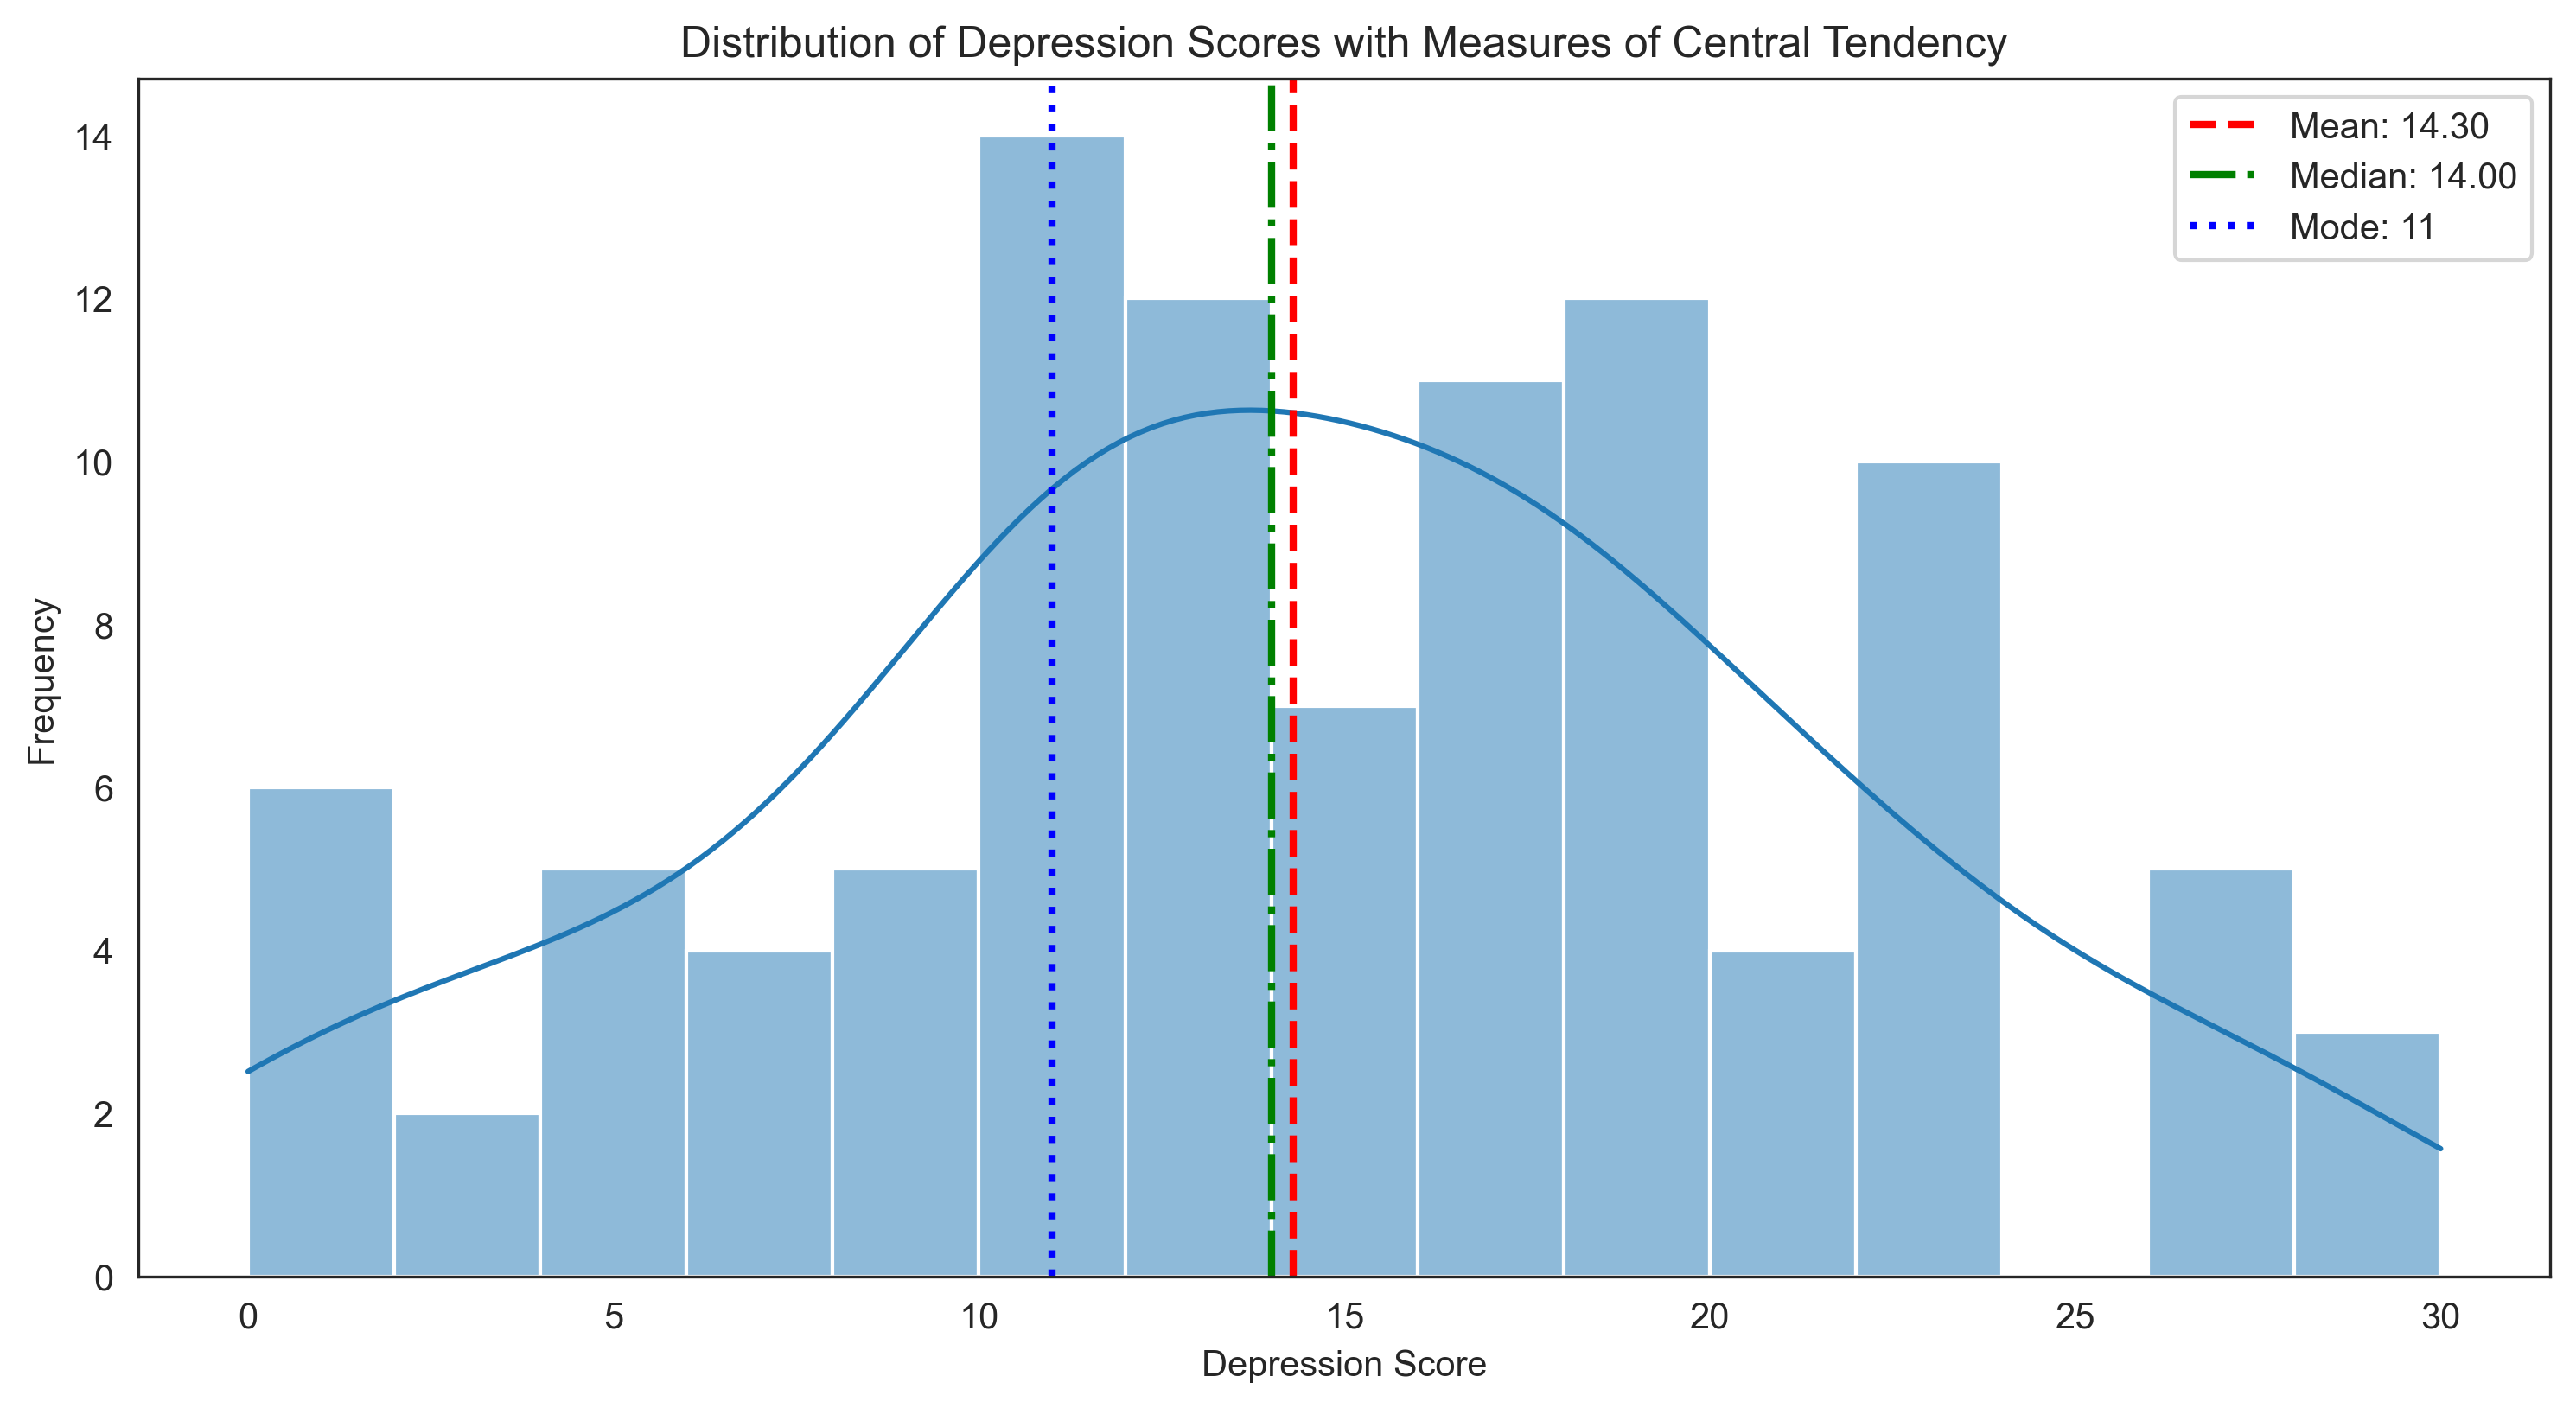

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(depression_scores, bins=15, kde=True)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_depression, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_depression:.2f}')
plt.axvline(median_depression, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_depression:.2f}')
plt.axvline(mode_depression, color='blue', linestyle=':', linewidth=2, label=f'Mode: {mode_depression}')

plt.title('Distribution of Depression Scores with Measures of Central Tendency')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### When to Use Each Measure of Central Tendency

- **Mean**: Best for interval and ratio data with symmetric distributions. Sensitive to outliers.
- **Median**: Robust to outliers, appropriate for skewed distributions and ordinal data.
- **Mode**: The only measure applicable to nominal data, also useful for multimodal distributions.

Let's see how these measures behave with skewed data:

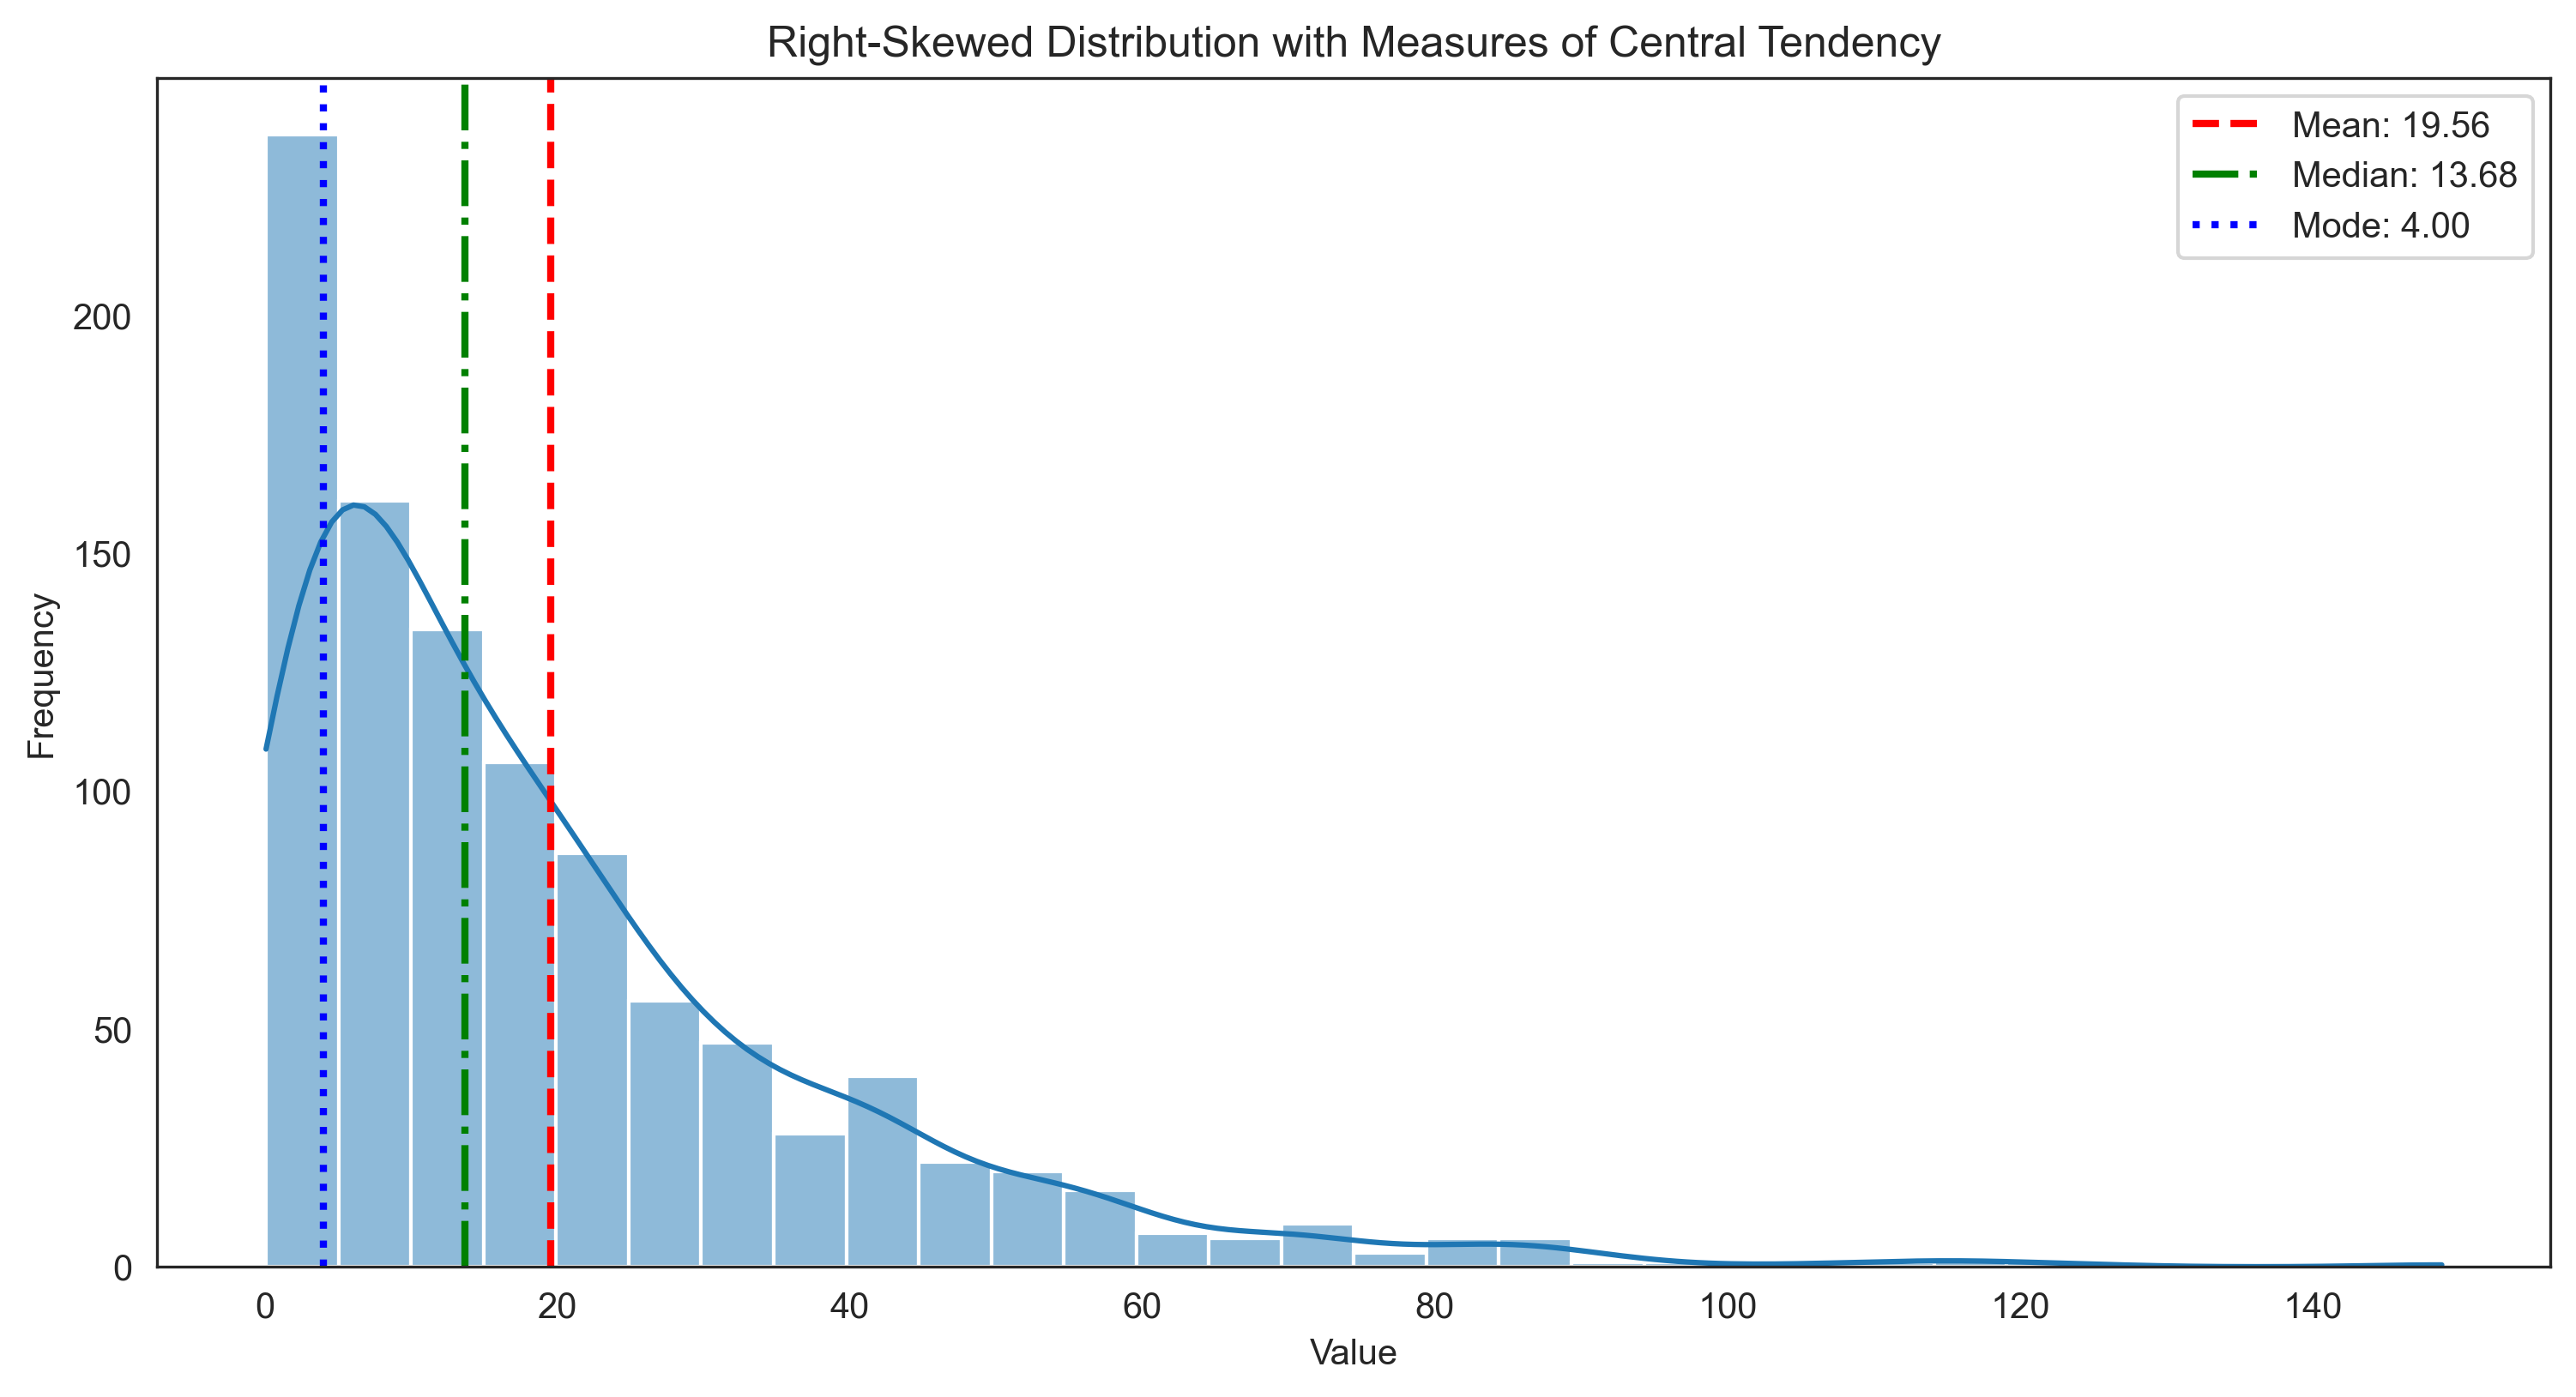

For skewed distributions:
Mean: 19.56 (pulled toward the tail)
Median: 13.68 (more robust to skewness)
Mode: 4.00 (approximate)

Note: For right-skewed distributions: Mode < Median < Mean
For left-skewed distributions: Mean < Median < Mode


In [5]:
# Create a right-skewed distribution (common in reaction time data)
skewed_data = np.random.exponential(scale=20, size=1000)

# Calculate measures of central tendency
mean_skewed = np.mean(skewed_data)
median_skewed = np.median(skewed_data)
mode_skewed = stats.mode(skewed_data.round(1), keepdims=True).mode[0]  # Approximate mode

# Visualize
plt.figure(figsize=(12, 6))
sns.histplot(skewed_data, bins=30, kde=True)

plt.axvline(mean_skewed, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_skewed:.2f}')
plt.axvline(median_skewed, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_skewed:.2f}')
plt.axvline(mode_skewed, color='blue', linestyle=':', linewidth=2, label=f'Mode: {mode_skewed:.2f}')

plt.title('Right-Skewed Distribution with Measures of Central Tendency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("For skewed distributions:")
print(f"Mean: {mean_skewed:.2f} (pulled toward the tail)")
print(f"Median: {median_skewed:.2f} (more robust to skewness)")
print(f"Mode: {mode_skewed:.2f} (approximate)")
print("\nNote: For right-skewed distributions: Mode < Median < Mean")
print("For left-skewed distributions: Mean < Median < Mode")

## Measures of Variability

While measures of central tendency tell us about the typical value, measures of variability describe how spread out the data is. Common measures include:

1. **Range**: The difference between the maximum and minimum values
2. **Interquartile Range (IQR)**: The range of the middle 50% of the data
3. **Variance**: The average of squared deviations from the mean
4. **Standard Deviation**: The square root of the variance

Let's calculate these measures for our depression scores and reaction times:

In [6]:
# Depression scores
range_depression = np.max(depression_scores) - np.min(depression_scores)
iqr_depression = np.percentile(depression_scores, 75) - np.percentile(depression_scores, 25)
var_depression = np.var(depression_scores, ddof=1)  # ddof=1 for sample variance
std_depression = np.std(depression_scores, ddof=1)  # ddof=1 for sample standard deviation

print("Variability in Depression Scores:")
print(f"Range: {range_depression}")
print(f"Interquartile Range (IQR): {iqr_depression}")
print(f"Variance: {var_depression:.2f}")
print(f"Standard Deviation: {std_depression:.2f}")

# Reaction times
range_rt = np.max(reaction_times) - np.min(reaction_times)
iqr_rt = np.percentile(reaction_times, 75) - np.percentile(reaction_times, 25)
var_rt = np.var(reaction_times, ddof=1)
std_rt = np.std(reaction_times, ddof=1)

print("\nVariability in Reaction Times:")
print(f"Range: {range_rt:.2f} ms")
print(f"Interquartile Range (IQR): {iqr_rt:.2f} ms")
print(f"Variance: {var_rt:.2f} ms²")
print(f"Standard Deviation: {std_rt:.2f} ms")

Variability in Depression Scores:
Range: 30
Interquartile Range (IQR): 8.25
Variance: 50.70
Standard Deviation: 7.12

Variability in Reaction Times:
Range: 916.75 ms
Interquartile Range (IQR): 148.46 ms
Variance: 16830.76 ms²
Standard Deviation: 129.73 ms


Let's visualize these measures of variability for the depression scores:

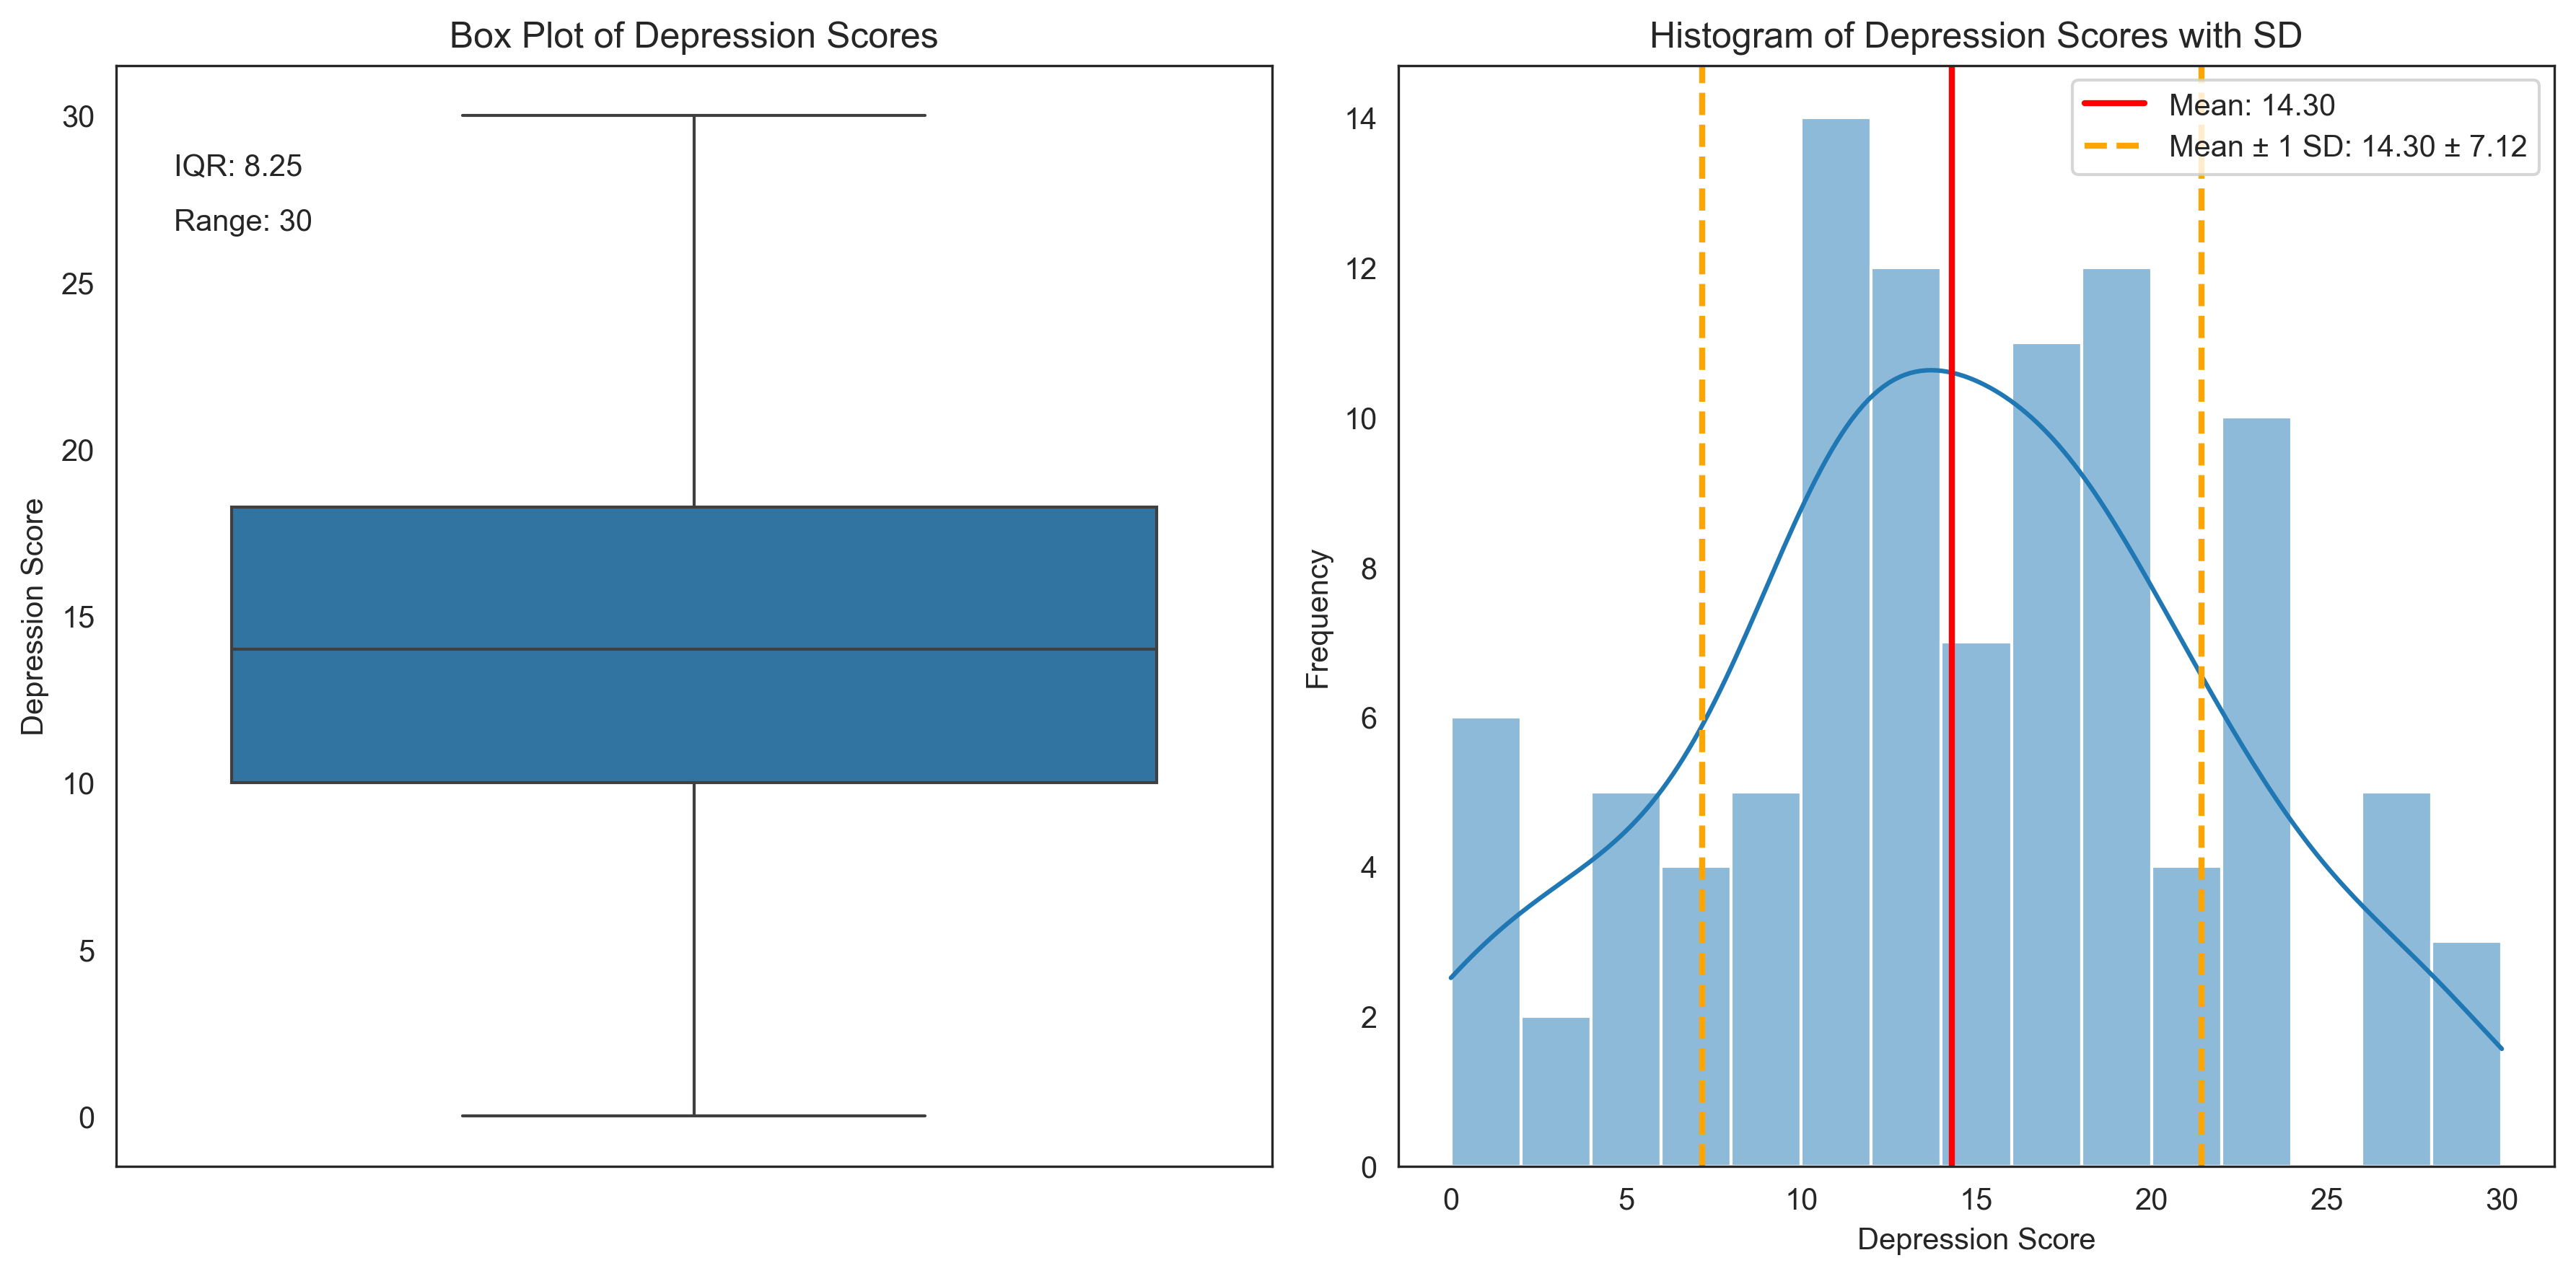

In [7]:
plt.figure(figsize=(12, 6))

# Create a box plot to show IQR
plt.subplot(1, 2, 1)
sns.boxplot(y=depression_scores)
plt.title('Box Plot of Depression Scores')
plt.ylabel('Depression Score')
plt.annotate(f"IQR: {iqr_depression}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.annotate(f"Range: {range_depression}", xy=(0.05, 0.85), xycoords='axes fraction')

# Create a histogram with standard deviation markers
plt.subplot(1, 2, 2)
sns.histplot(depression_scores, bins=15, kde=True)
plt.axvline(mean_depression, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_depression:.2f}')

# Add standard deviation markers
plt.axvline(mean_depression + std_depression, color='orange', linestyle='--', linewidth=2, 
            label=f'Mean ± 1 SD: {mean_depression:.2f} ± {std_depression:.2f}')
plt.axvline(mean_depression - std_depression, color='orange', linestyle='--', linewidth=2)

plt.title('Histogram of Depression Scores with SD')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### Interpreting Standard Deviation

The standard deviation is particularly useful because it tells us about the typical distance of data points from the mean. In a normal distribution:

- Approximately 68% of data falls within 1 standard deviation of the mean
- Approximately 95% of data falls within 2 standard deviations of the mean
- Approximately 99.7% of data falls within 3 standard deviations of the mean

This is known as the **empirical rule** or the **68-95-99.7 rule**.

Let's visualize this with a normal distribution:

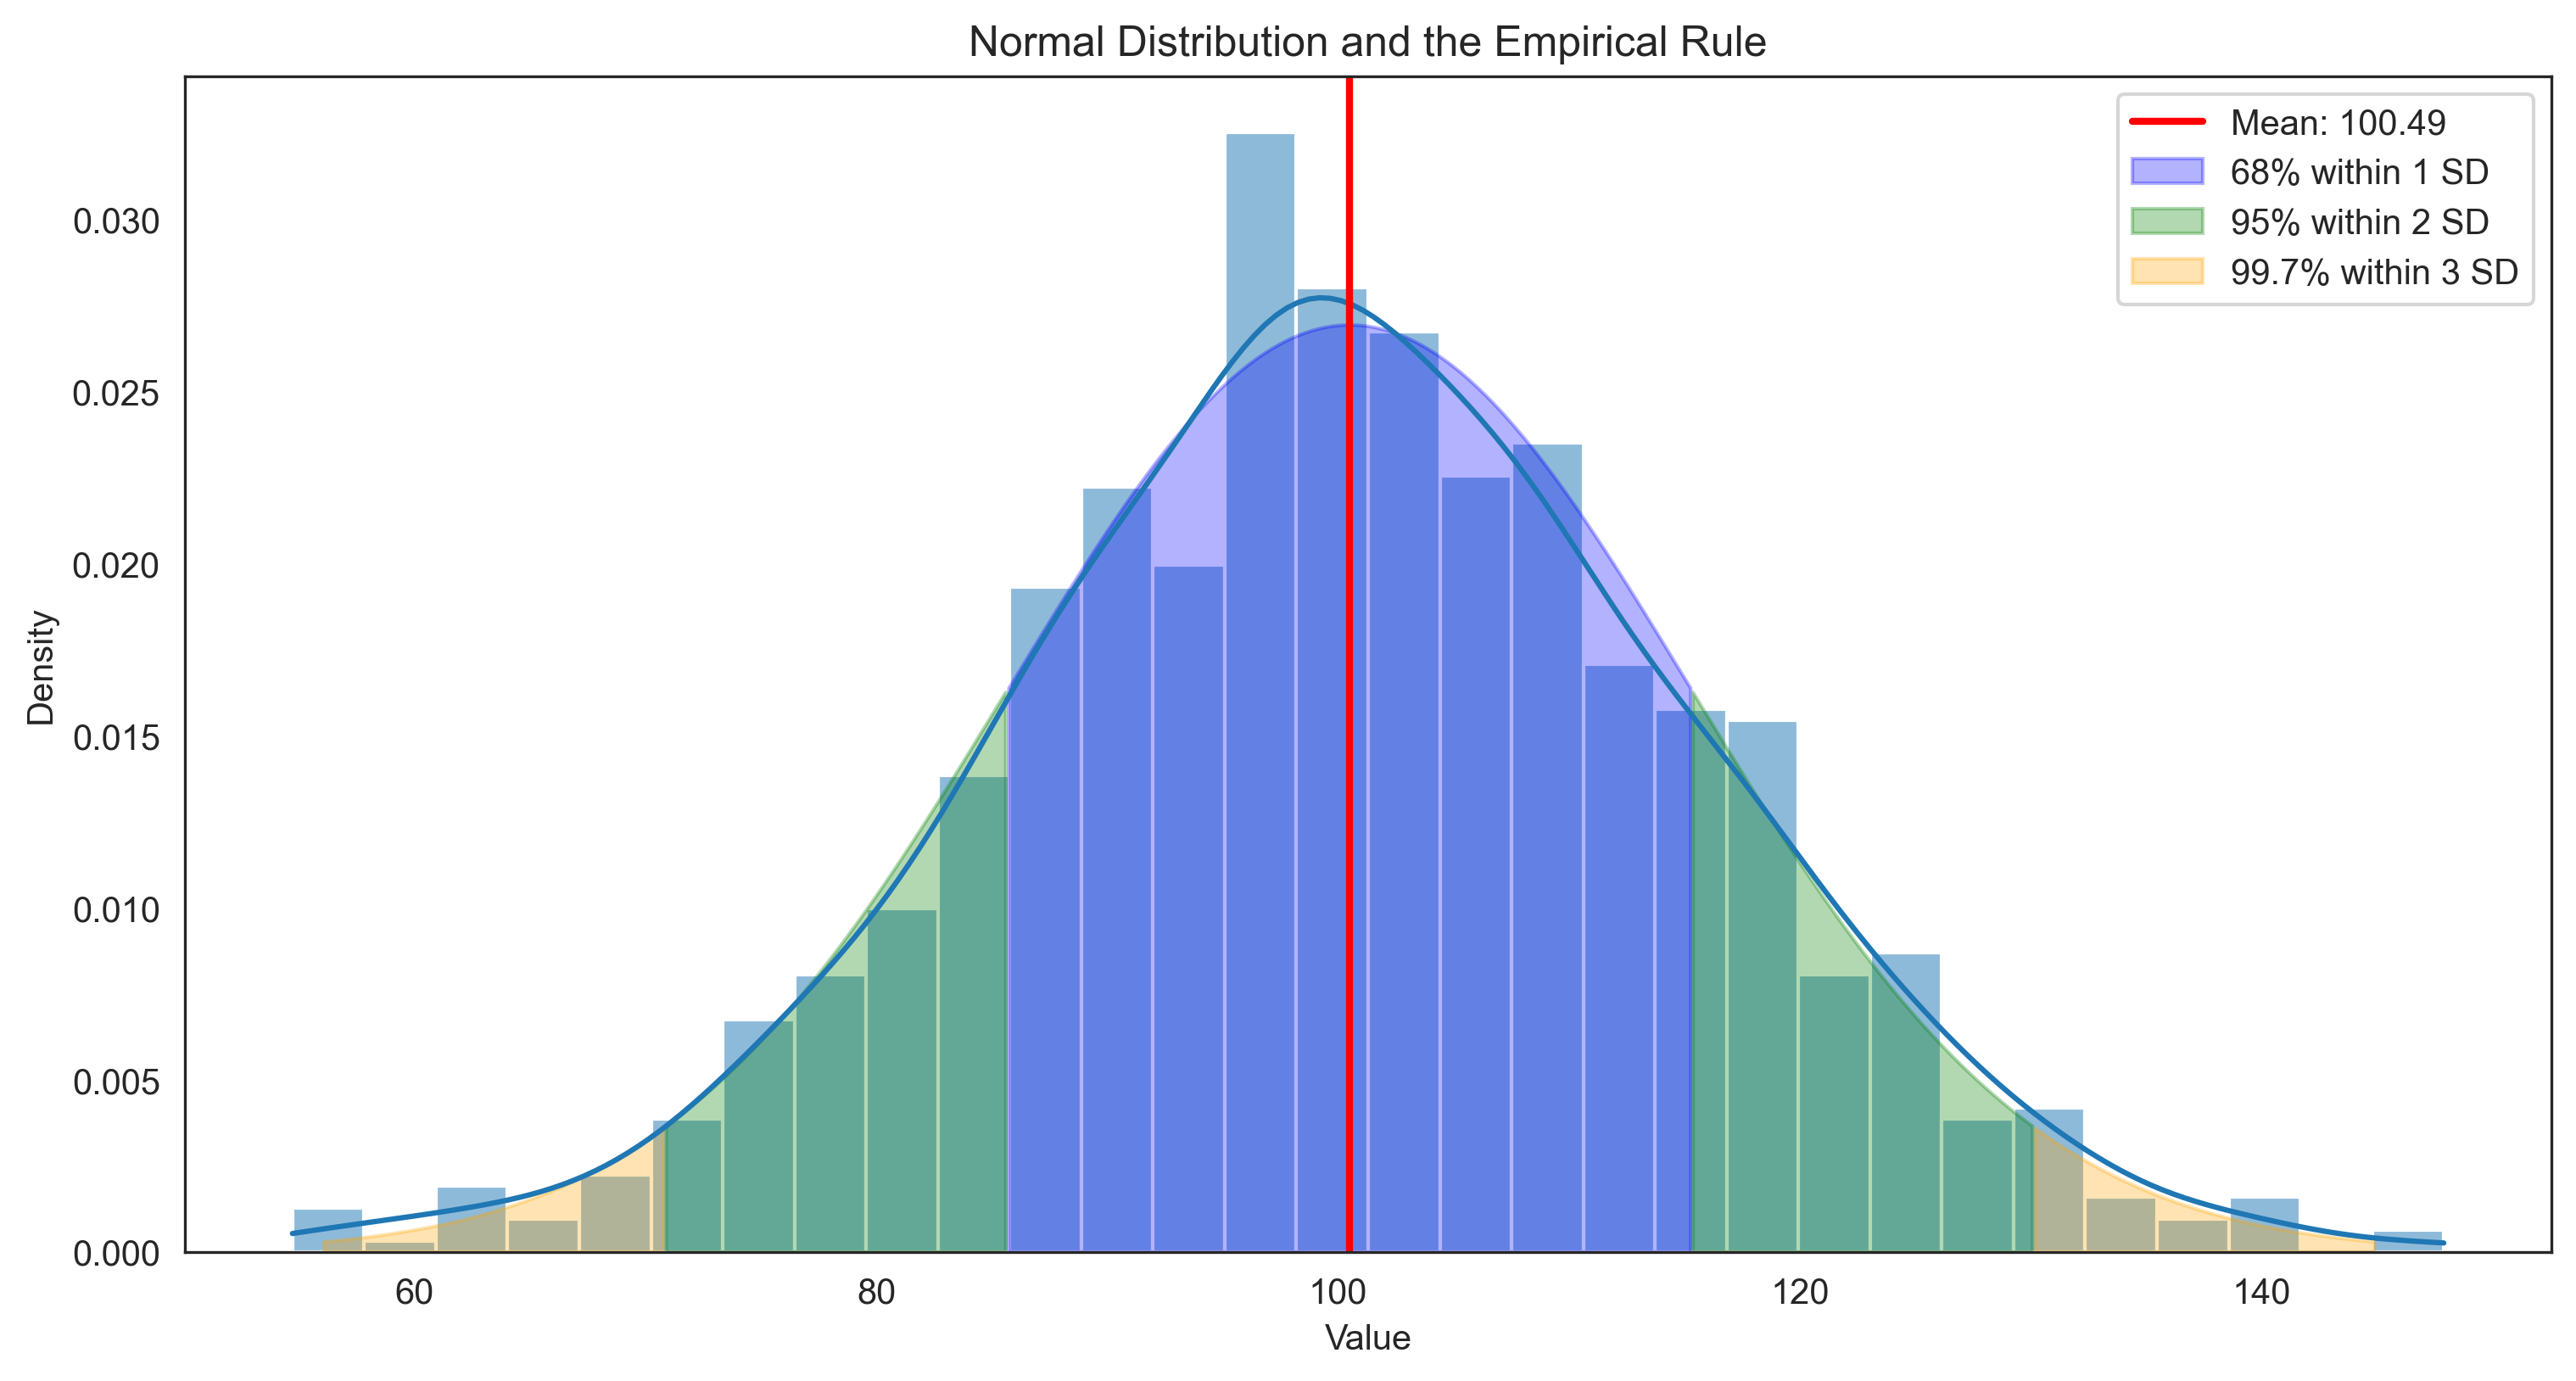

Empirical Rule in Our Data:
Percentage within 1 SD: 68.7% (expected: 68%)
Percentage within 2 SD: 95.0% (expected: 95%)
Percentage within 3 SD: 99.6% (expected: 99.7%)


In [8]:
# Generate normally distributed data
normal_data = np.random.normal(loc=100, scale=15, size=1000)
mean_normal = np.mean(normal_data)
std_normal = np.std(normal_data, ddof=1)

plt.figure(figsize=(12, 6))
sns.histplot(normal_data, bins=30, kde=True, stat='density')

# Add mean line
plt.axvline(mean_normal, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_normal:.2f}')

# Add standard deviation regions
x = np.linspace(mean_normal - 4*std_normal, mean_normal + 4*std_normal, 1000)
y = stats.norm.pdf(x, mean_normal, std_normal)

# Shade regions
plt.fill_between(x, y, where=((x >= mean_normal - std_normal) & (x <= mean_normal + std_normal)), 
                 color='blue', alpha=0.3, label='68% within 1 SD')
plt.fill_between(x, y, where=((x >= mean_normal - 2*std_normal) & (x <= mean_normal + 2*std_normal) & 
                             ~((x >= mean_normal - std_normal) & (x <= mean_normal + std_normal))), 
                 color='green', alpha=0.3, label='95% within 2 SD')
plt.fill_between(x, y, where=((x >= mean_normal - 3*std_normal) & (x <= mean_normal + 3*std_normal) & 
                             ~((x >= mean_normal - 2*std_normal) & (x <= mean_normal + 2*std_normal))), 
                 color='orange', alpha=0.3, label='99.7% within 3 SD')

plt.title('Normal Distribution and the Empirical Rule')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate actual percentages in our data
within_1sd = np.mean((normal_data >= mean_normal - std_normal) & (normal_data <= mean_normal + std_normal)) * 100
within_2sd = np.mean((normal_data >= mean_normal - 2*std_normal) & (normal_data <= mean_normal + 2*std_normal)) * 100
within_3sd = np.mean((normal_data >= mean_normal - 3*std_normal) & (normal_data <= mean_normal + 3*std_normal)) * 100

print("Empirical Rule in Our Data:")
print(f"Percentage within 1 SD: {within_1sd:.1f}% (expected: 68%)")
print(f"Percentage within 2 SD: {within_2sd:.1f}% (expected: 95%)")
print(f"Percentage within 3 SD: {within_3sd:.1f}% (expected: 99.7%)")

### Coefficient of Variation

The **coefficient of variation (CV)** is a standardized measure of dispersion that allows us to compare variability across different scales or units. It's calculated as:

$$CV = \frac{\text{Standard Deviation}}{\text{Mean}} \times 100\%$$

This is particularly useful in psychology when comparing variability across different measures or populations:

In [9]:
# Calculate coefficient of variation for depression scores and reaction times
cv_depression = (std_depression / mean_depression) * 100
cv_rt = (std_rt / mean_rt) * 100

print("Coefficient of Variation:")
print(f"Depression Scores: {cv_depression:.2f}%")
print(f"Reaction Times: {cv_rt:.2f}%")

if cv_depression > cv_rt:
    print("\nDepression scores show more relative variability than reaction times.")
else:
    print("\nReaction times show more relative variability than depression scores.")

Coefficient of Variation:
Depression Scores: 49.79%
Reaction Times: 50.90%

Reaction times show more relative variability than depression scores.


## Measures of Position

Measures of position help us understand where a particular value stands relative to the rest of the distribution. Common measures include:

1. **Percentiles**: Values that divide the data into 100 equal parts
2. **Quartiles**: Values that divide the data into 4 equal parts (25th, 50th, and 75th percentiles)
3. **Z-scores**: The number of standard deviations a value is from the mean

Let's calculate and visualize these measures:

In [10]:
# Calculate quartiles for depression scores
q1_depression = np.percentile(depression_scores, 25)
q2_depression = np.percentile(depression_scores, 50)  # Same as median
q3_depression = np.percentile(depression_scores, 75)

print("Quartiles for Depression Scores:")
print(f"Q1 (25th percentile): {q1_depression}")
print(f"Q2 (50th percentile): {q2_depression} (median)")
print(f"Q3 (75th percentile): {q3_depression}")
print(f"Interquartile Range (IQR): {q3_depression - q1_depression}")

# Calculate z-scores for a few example depression scores
example_scores = [5, 15, 25, 35]
z_scores = [(score - mean_depression) / std_depression for score in example_scores]

print("\nZ-scores for Example Depression Scores:")
for score, z in zip(example_scores, z_scores):
    print(f"Score: {score}, Z-score: {z:.2f}")
    
# Calculate percentiles for these scores
percentiles = [stats.percentileofscore(depression_scores, score) for score in example_scores]

print("\nPercentiles for Example Depression Scores:")
for score, p in zip(example_scores, percentiles):
    print(f"Score: {score}, Percentile: {p:.1f}")

Quartiles for Depression Scores:
Q1 (25th percentile): 10.0
Q2 (50th percentile): 14.0 (median)
Q3 (75th percentile): 18.25
Interquartile Range (IQR): 8.25

Z-scores for Example Depression Scores:
Score: 5, Z-score: -1.31
Score: 15, Z-score: 0.10
Score: 25, Z-score: 1.50
Score: 35, Z-score: 2.91

Percentiles for Example Depression Scores:
Score: 5, Percentile: 12.5
Score: 15, Percentile: 54.0
Score: 25, Percentile: 92.0
Score: 35, Percentile: 100.0


Let's visualize these measures of position:

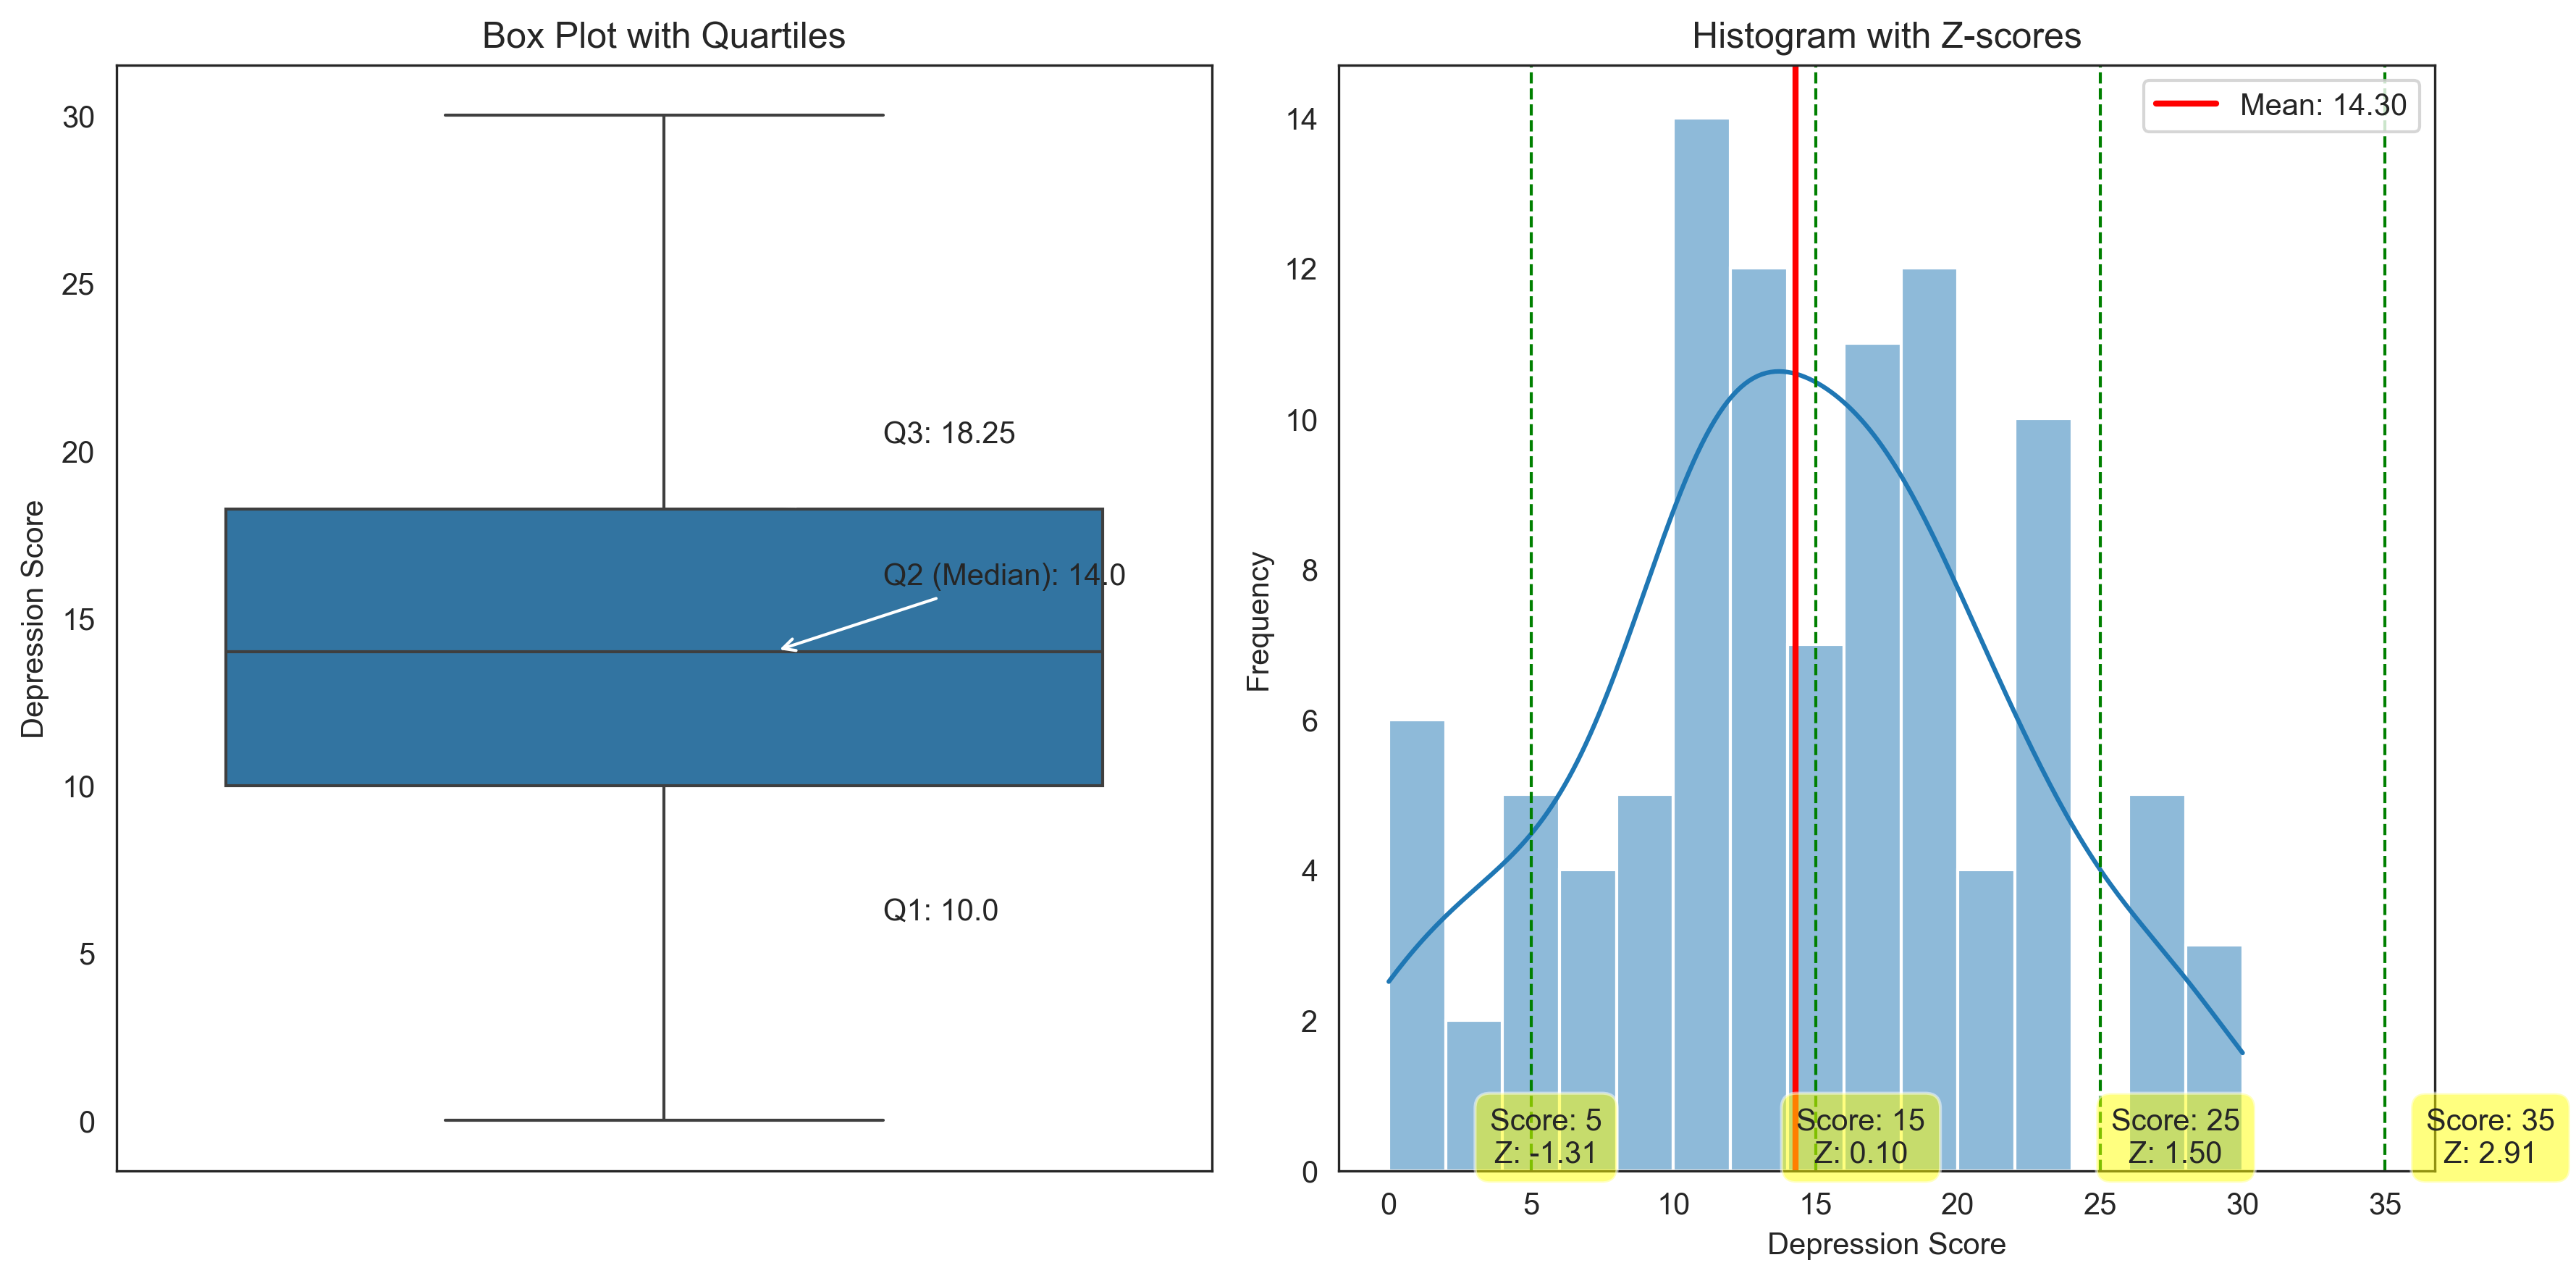

In [11]:
plt.figure(figsize=(12, 6))

# Create a box plot with quartiles
plt.subplot(1, 2, 1)
sns.boxplot(y=depression_scores)
plt.title('Box Plot with Quartiles')
plt.ylabel('Depression Score')

# Add annotations for quartiles
plt.annotate(f"Q3: {q3_depression}", xy=(0.1, q3_depression), xytext=(0.2, q3_depression+2),
             arrowprops=dict(arrowstyle="->"))
plt.annotate(f"Q2 (Median): {q2_depression}", xy=(0.1, q2_depression), xytext=(0.2, q2_depression+2),
             arrowprops=dict(arrowstyle="->"))
plt.annotate(f"Q1: {q1_depression}", xy=(0.1, q1_depression), xytext=(0.2, q1_depression-4),
             arrowprops=dict(arrowstyle="->"))

# Create a histogram with z-scores
plt.subplot(1, 2, 2)
sns.histplot(depression_scores, bins=15, kde=True)
plt.title('Histogram with Z-scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')

# Add mean line
plt.axvline(mean_depression, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_depression:.2f}')

# Add example scores with z-scores
for score, z in zip(example_scores, z_scores):
    plt.axvline(score, color='green', linestyle='--', linewidth=1)
    plt.annotate(f"Score: {score}\nZ: {z:.2f}", xy=(score, 0), xytext=(score, 1),
                 textcoords='offset points', ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.legend()
plt.tight_layout()
plt.show()

### Z-scores and Standardization

Z-scores (also called standard scores) are particularly useful in psychology because they:

1. Allow us to compare values from different distributions
2. Help identify outliers (typically defined as z-scores > 3 or < -3)
3. Form the basis for many statistical tests
4. Enable us to interpret scores relative to a population

Let's standardize our depression scores and reaction times to compare them:

In [12]:
# Import necessary libraries
import pandas as pd
from scipy import stats

# Standardize both variables
z_depression = stats.zscore(depression_scores)
z_rt = stats.zscore(reaction_times)

# Create a DataFrame with original and standardized scores
comparison_df = pd.DataFrame({
    'Depression_Score': depression_scores,
    'Depression_Z': z_depression,
    'Reaction_Time': reaction_times,
    'Reaction_Time_Z': z_rt
})

# Display the first few rows
comparison_df.head()

Depression_Score  Depression_Z  Reaction_Time  Reaction_Time_Z
0                19      0.663421     111.413126        -1.111345
1                14     -0.042346     190.783683        -0.496465
2                20      0.804574     216.342440        -0.298463
3                27      1.792648     279.753313         0.192777
4                13     -0.183499     262.272137         0.057352

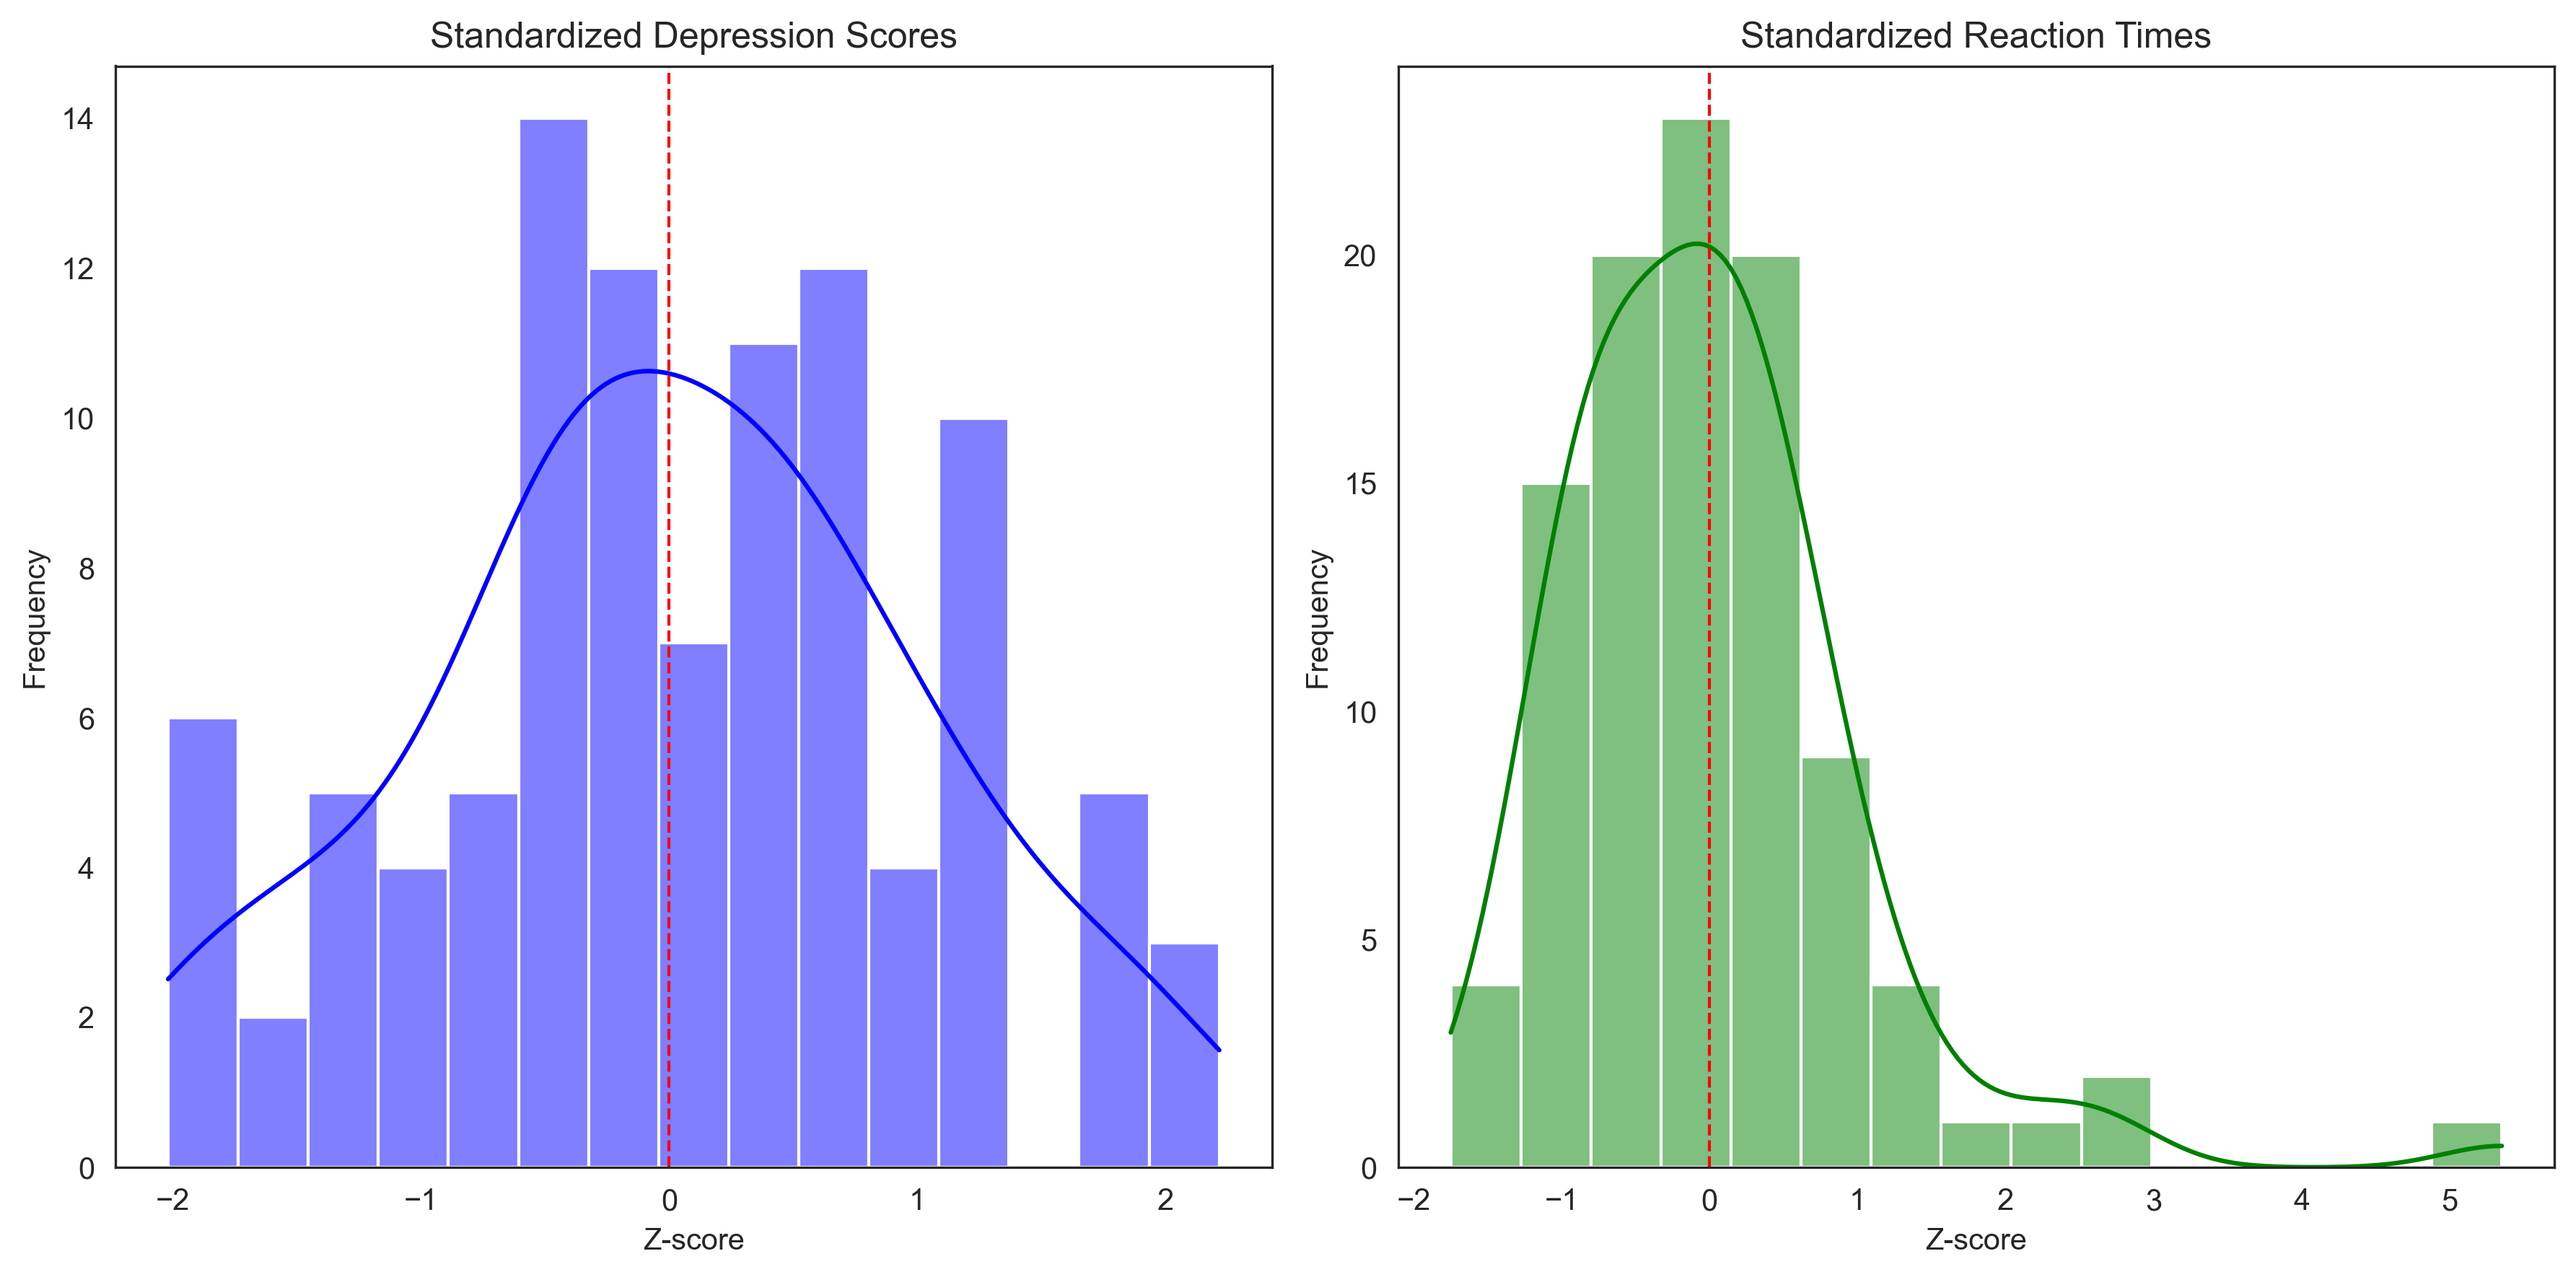

Number of potential outliers in depression scores (|z| > 3): 0
Number of potential outliers in reaction times (|z| > 3): 1


In [13]:
# Plot the standardized scores to compare distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(z_depression, bins=15, kde=True, color='blue')
plt.title('Standardized Depression Scores')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=1)

plt.subplot(1, 2, 2)
sns.histplot(z_rt, bins=15, kde=True, color='green')
plt.title('Standardized Reaction Times')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# Identify potential outliers (|z| > 3)
depression_outliers = np.sum(np.abs(z_depression) > 3)
rt_outliers = np.sum(np.abs(z_rt) > 3)

print(f"Number of potential outliers in depression scores (|z| > 3): {depression_outliers}")
print(f"Number of potential outliers in reaction times (|z| > 3): {rt_outliers}")

## Measures of Shape

The shape of a distribution provides important information about the data. Two key measures of shape are:

1. **Skewness**: Measures the asymmetry of the distribution
   - Positive skew: Tail extends to the right (higher values)
   - Negative skew: Tail extends to the left (lower values)
   - Zero skew: Symmetric distribution

2. **Kurtosis**: Measures the "tailedness" of the distribution
   - Positive kurtosis (leptokurtic): Heavy tails, more outliers
   - Negative kurtosis (platykurtic): Light tails, fewer outliers
   - Zero kurtosis (mesokurtic): Normal distribution

Let's calculate and visualize these measures for our data:

In [14]:
# Calculate skewness and kurtosis
skew_depression = stats.skew(depression_scores)
kurt_depression = stats.kurtosis(depression_scores)  # Fisher's definition (normal = 0)

skew_rt = stats.skew(reaction_times)
kurt_rt = stats.kurtosis(reaction_times)

print("Measures of Shape:")
print(f"Depression Scores - Skewness: {skew_depression:.3f}, Kurtosis: {kurt_depression:.3f}")
print(f"Reaction Times - Skewness: {skew_rt:.3f}, Kurtosis: {kurt_rt:.3f}")

# Interpret skewness
def interpret_skewness(skew):
    if skew > 0.5:
        return "Substantially positively skewed (right tail)"
    elif skew < -0.5:
        return "Substantially negatively skewed (left tail)"
    elif skew > 0.1:
        return "Slightly positively skewed"
    elif skew < -0.1:
        return "Slightly negatively skewed"
    else:
        return "Approximately symmetric"

# Interpret kurtosis
def interpret_kurtosis(kurt):
    if kurt > 1:
        return "Leptokurtic (heavy tails, more outliers than normal)"
    elif kurt < -1:
        return "Platykurtic (light tails, fewer outliers than normal)"
    else:
        return "Mesokurtic (similar to normal distribution)"

print("\nInterpretation:")
print(f"Depression Scores: {interpret_skewness(skew_depression)}, {interpret_kurtosis(kurt_depression)}")
print(f"Reaction Times: {interpret_skewness(skew_rt)}, {interpret_kurtosis(kurt_rt)}")

Measures of Shape:
Depression Scores - Skewness: -0.043, Kurtosis: -0.442
Reaction Times - Skewness: 1.912, Kurtosis: 7.179

Interpretation:
Depression Scores: Approximately symmetric, Mesokurtic (similar to normal distribution)
Reaction Times: Substantially positively skewed (right tail), Leptokurtic (heavy tails, more outliers than normal)


Let's visualize distributions with different skewness and kurtosis to better understand these concepts:

Normal: Skewness = 0.117, Kurtosis = 0.066
Right-Skewed: Skewness = 1.981, Kurtosis = 5.379
Left-Skewed: Skewness = -1.635, Kurtosis = 3.005
High Kurtosis: Skewness = -0.114, Kurtosis = 4.403
Low Kurtosis: Skewness = 0.051, Kurtosis = -1.131


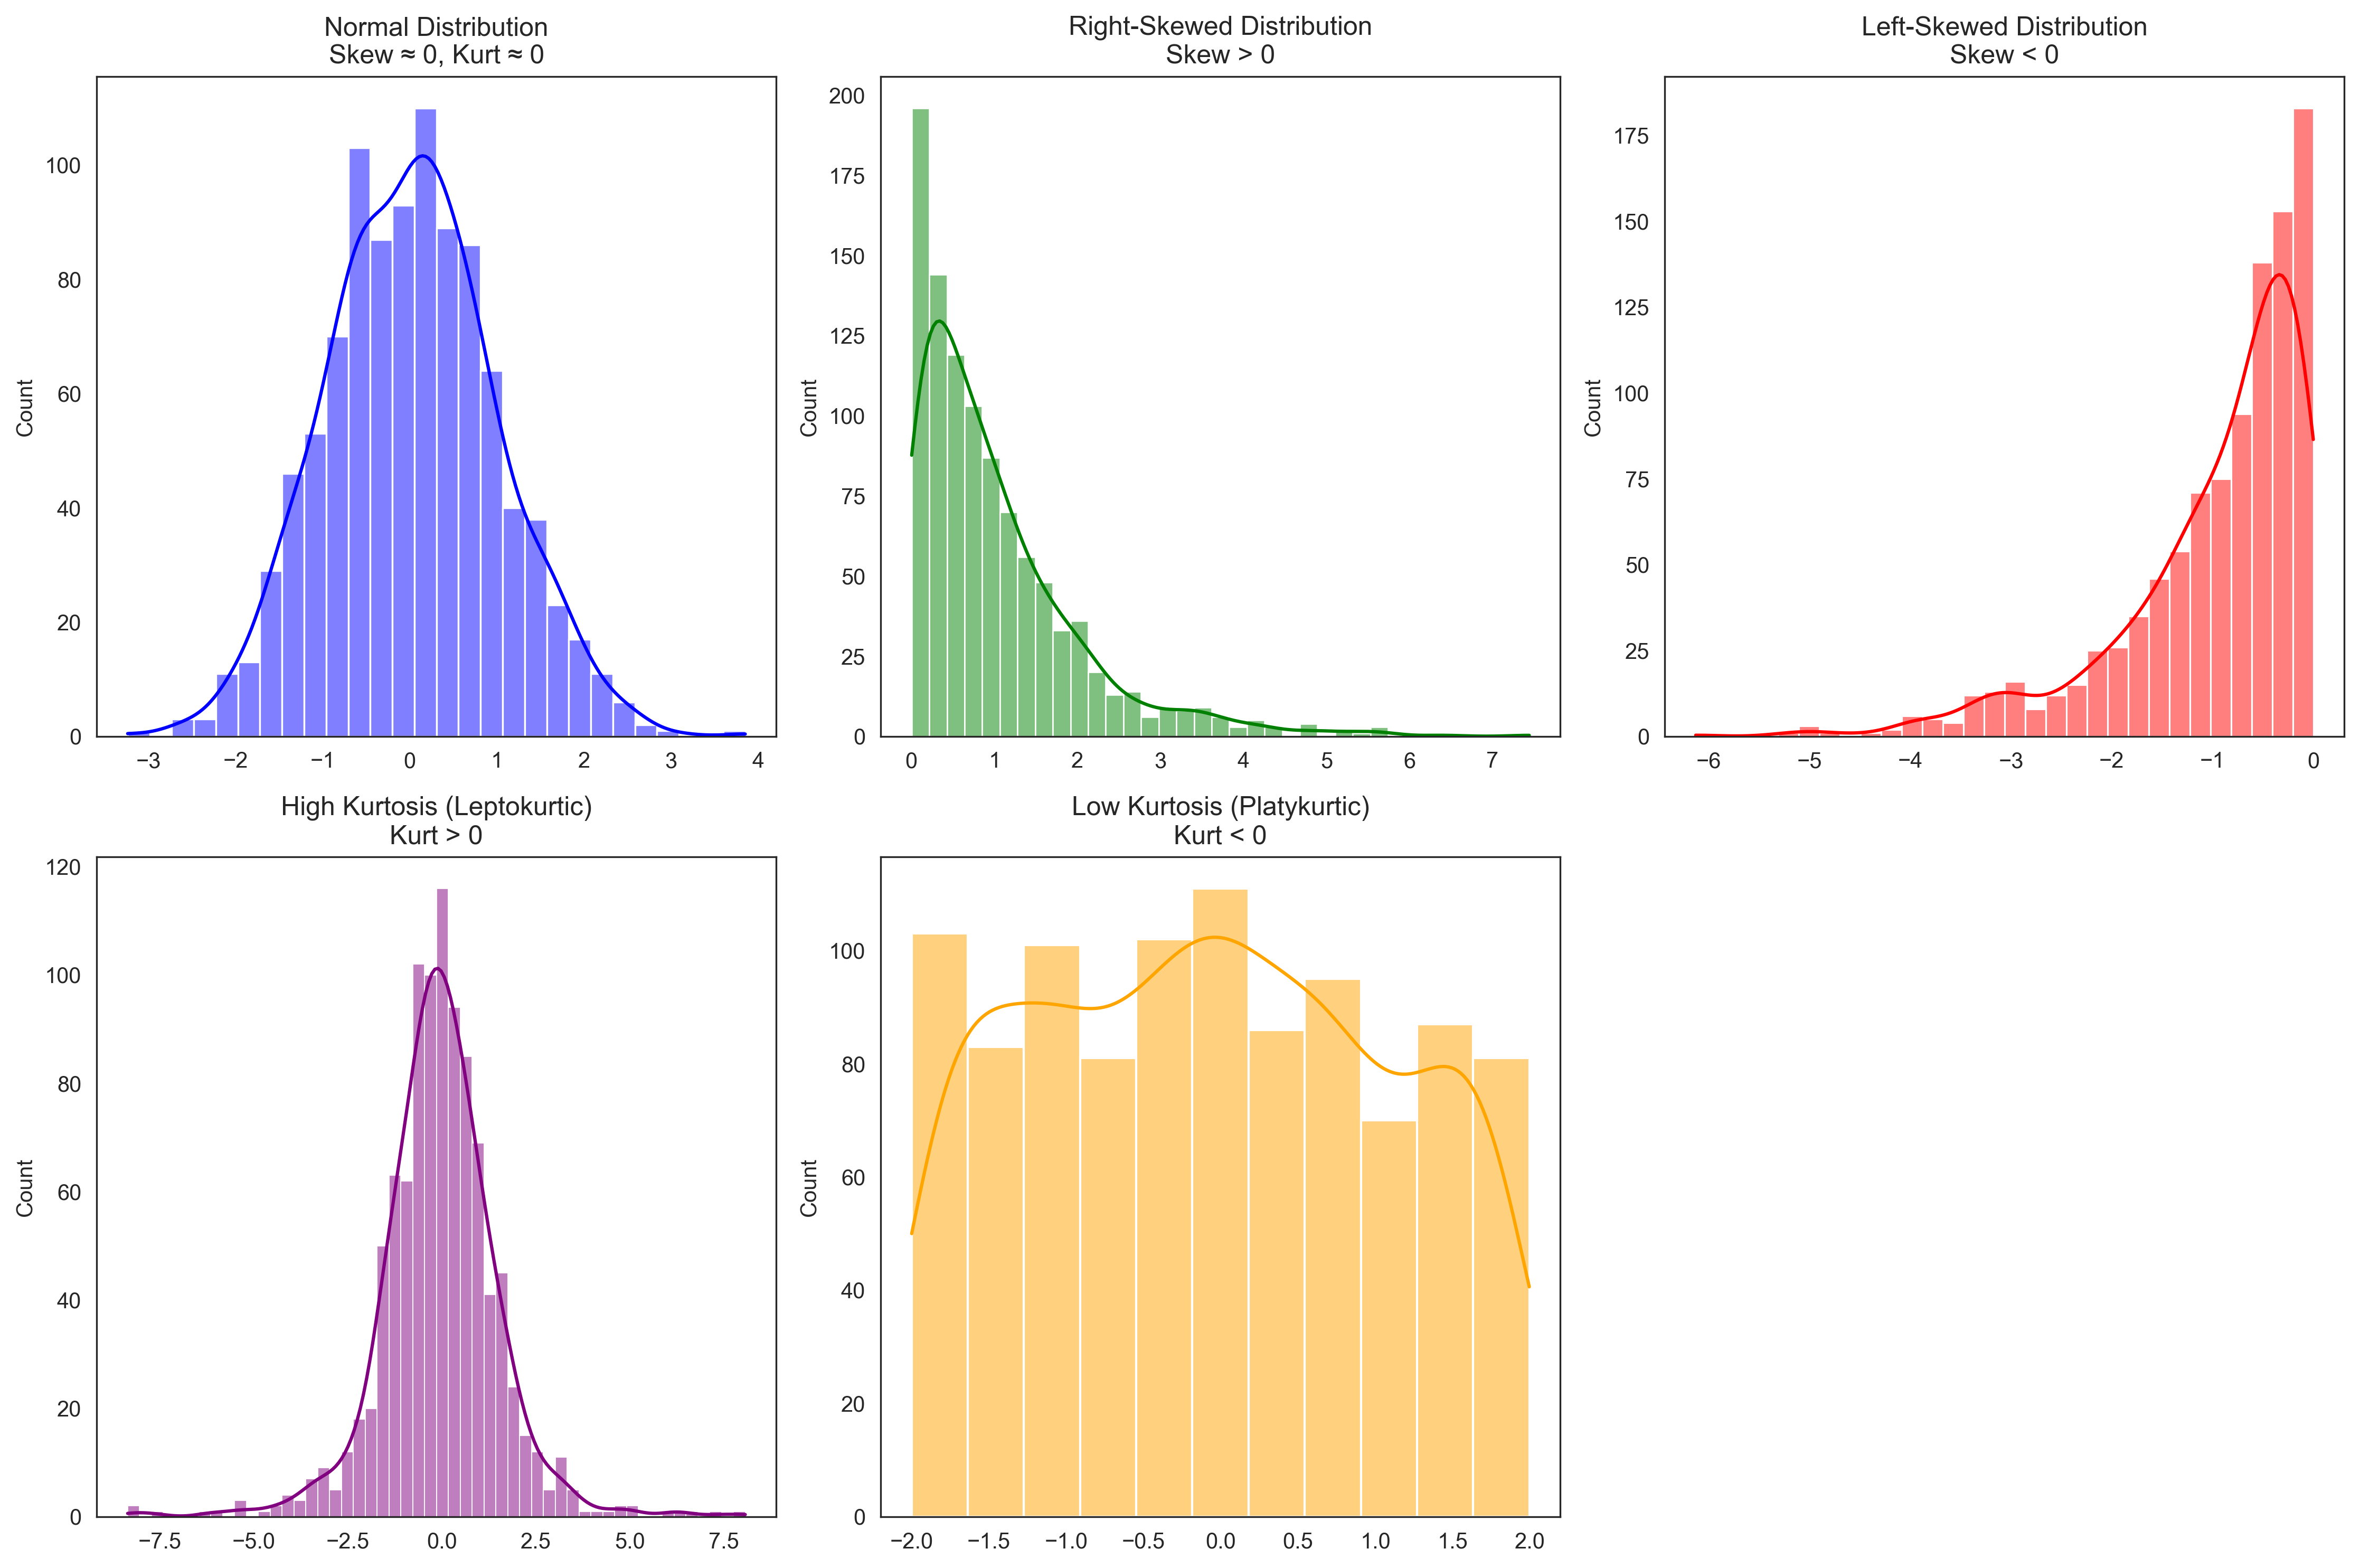

In [15]:
# Generate distributions with different shapes
np.random.seed(42)
# Normal distribution (symmetric, mesokurtic)
normal_dist = np.random.normal(0, 1, 1000)

# Right-skewed distribution
right_skewed = np.random.exponential(1, 1000)

# Left-skewed distribution
left_skewed = -np.random.exponential(1, 1000)

# High kurtosis (heavy tails)
high_kurtosis = np.random.standard_t(df=3, size=1000)  # t-distribution with 3 degrees of freedom

# Low kurtosis (light tails)
low_kurtosis = np.random.uniform(-2, 2, 1000)  # Uniform distribution

# Calculate skewness and kurtosis for each
distributions = {
    "Normal": normal_dist,
    "Right-Skewed": right_skewed,
    "Left-Skewed": left_skewed,
    "High Kurtosis": high_kurtosis,
    "Low Kurtosis": low_kurtosis
}

for name, dist in distributions.items():
    skew = stats.skew(dist)
    kurt = stats.kurtosis(dist)
    print(f"{name}: Skewness = {skew:.3f}, Kurtosis = {kurt:.3f}")

# Visualize the distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(normal_dist, kde=True, color='blue')
plt.title('Normal Distribution\nSkew ≈ 0, Kurt ≈ 0')

plt.subplot(2, 3, 2)
sns.histplot(right_skewed, kde=True, color='green')
plt.title('Right-Skewed Distribution\nSkew > 0')

plt.subplot(2, 3, 3)
sns.histplot(left_skewed, kde=True, color='red')
plt.title('Left-Skewed Distribution\nSkew < 0')

plt.subplot(2, 3, 4)
sns.histplot(high_kurtosis, kde=True, color='purple')
plt.title('High Kurtosis (Leptokurtic)\nKurt > 0')

plt.subplot(2, 3, 5)
sns.histplot(low_kurtosis, kde=True, color='orange')
plt.title('Low Kurtosis (Platykurtic)\nKurt < 0')

plt.tight_layout()
plt.show()

## Frequency Distributions and Visualizations

Frequency distributions organize data into categories or intervals and count how many observations fall into each. They can be displayed in various ways:

1. **Frequency Tables**: Show counts for each category or interval
2. **Histograms**: Display frequency distributions for continuous data
3. **Bar Charts**: Display frequency distributions for categorical data
4. **Pie Charts**: Show proportions of a whole
5. **Box Plots**: Display the five-number summary (minimum, Q1, median, Q3, maximum)

Let's create these visualizations for our psychological data:

In [16]:
# Frequency table for depression scores (grouped into intervals)
depression_bins = [0, 10, 20, 30, 40, 50, 63]
depression_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-63']
depression_categories = pd.cut(depression_scores, bins=depression_bins, labels=depression_labels)
# Fix: Use pd.Series().value_counts() instead of pd.value_counts()
depression_freq = pd.Series(depression_categories).value_counts().sort_index()

print("Frequency Table for Depression Scores:")
depression_table = pd.DataFrame({
    'Frequency': depression_freq,
    'Relative Frequency': depression_freq / len(depression_scores),
    'Cumulative Frequency': np.cumsum(depression_freq),
    'Cumulative Relative Frequency': np.cumsum(depression_freq) / len(depression_scores)
})
print(depression_table)

# Frequency table for Likert responses (categorical)
# Fix: Use pd.Series().value_counts() instead of pd.value_counts()
likert_freq = pd.Series(likert_responses).value_counts().sort_index()
likert_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

print("\nFrequency Table for Satisfaction Ratings:")
likert_table = pd.DataFrame({
    'Response': likert_labels,
    'Frequency': likert_freq.values,
    'Relative Frequency': likert_freq.values / len(likert_responses),
})
print(likert_table)

# Frequency table for treatment conditions (nominal)
# Fix: Use pd.Series().value_counts() instead of pd.value_counts()
condition_freq = pd.Series(conditions).value_counts()

print("\nFrequency Table for Treatment Conditions:")
condition_table = pd.DataFrame({
    'Condition': condition_freq.index,
    'Frequency': condition_freq.values,
    'Relative Frequency': condition_freq.values / len(conditions),
})
print(condition_table)

Frequency Table for Depression Scores:
       Frequency  Relative Frequency  Cumulative Frequency  \
0-9           22                0.22                    22   
10-19         54                0.54                    76   
20-29         20                0.20                    96   
30-39          0                0.00                    96   
40-49          0                0.00                    96   
50-63          0                0.00                    96   

       Cumulative Relative Frequency  
0-9                             0.22  
10-19                           0.76  
20-29                           0.96  
30-39                           0.96  
40-49                           0.96  
50-63                           0.96  

Frequency Table for Satisfaction Ratings:
            Response  Frequency  Relative Frequency
0  Strongly Disagree         16                0.16
1           Disagree         12                0.12
2            Neutral         39                0.39
3 

Now let's create visualizations for these frequency distributions:

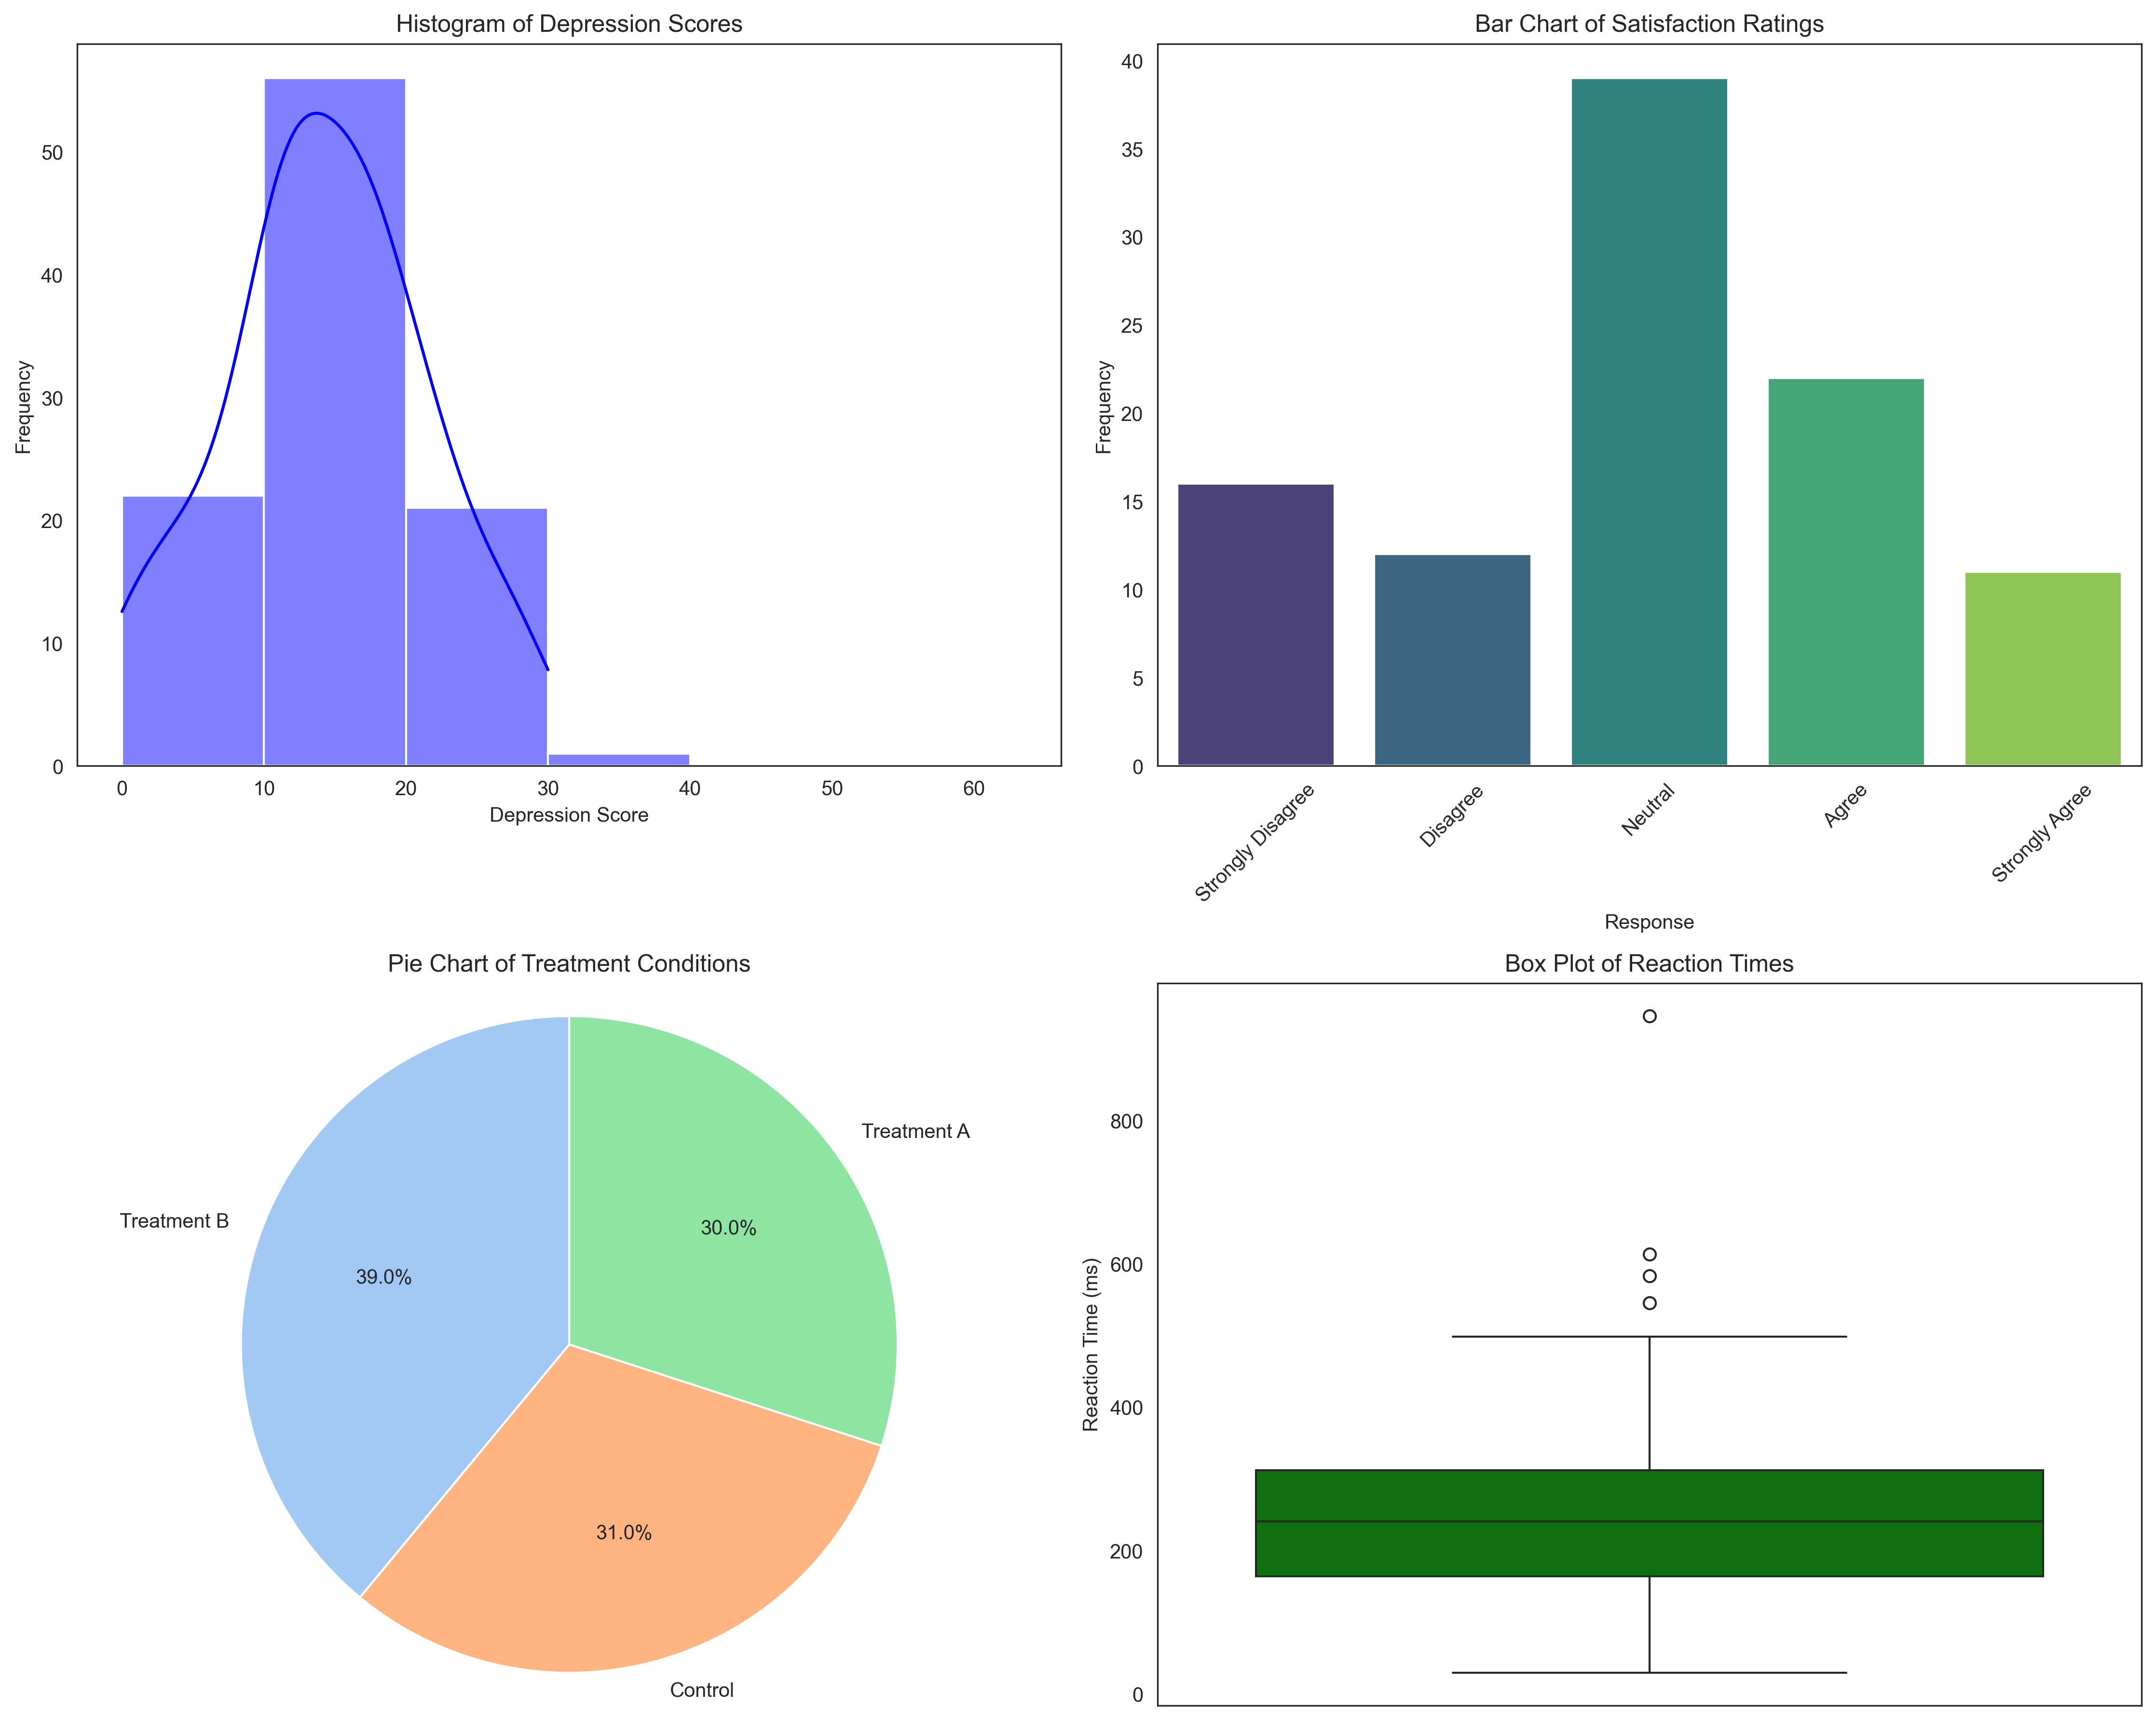

In [17]:
plt.figure(figsize=(15, 12))

# Histogram for depression scores
plt.subplot(2, 2, 1)
sns.histplot(depression_scores, bins=depression_bins, kde=True, color='blue')
plt.title('Histogram of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')

# Bar chart for Likert responses
plt.subplot(2, 2, 2)
# Fix: Create a DataFrame for barplot and use hue parameter instead of palette directly
likert_df = pd.DataFrame({'Response': likert_labels, 'Frequency': likert_freq.values})
sns.barplot(x='Response', y='Frequency', hue='Response', data=likert_df, palette='viridis', legend=False)
plt.title('Bar Chart of Satisfaction Ratings')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Pie chart for treatment conditions
plt.subplot(2, 2, 3)
plt.pie(condition_freq.values, labels=condition_freq.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Treatment Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Box plot for reaction times
plt.subplot(2, 2, 4)
sns.boxplot(y=reaction_times, color='green')
plt.title('Box Plot of Reaction Times')
plt.ylabel('Reaction Time (ms)')

plt.tight_layout()
plt.show()

## Bivariate Descriptive Statistics

So far, we've focused on describing single variables. Now let's explore relationships between pairs of variables using bivariate descriptive statistics. Key measures include:

1. **Covariance**: Measures how two variables change together
2. **Correlation**: Standardized measure of the relationship between two variables
3. **Contingency tables**: Show the relationship between categorical variables

Let's examine relationships in our psychological data:

In [18]:
# Calculate covariance and correlation between depression scores and reaction times
covariance = np.cov(depression_scores, reaction_times)[0, 1]
correlation = np.corrcoef(depression_scores, reaction_times)[0, 1]

print("Relationship between Depression Scores and Reaction Times:")
print(f"Covariance: {covariance:.2f}")
print(f"Pearson Correlation: {correlation:.2f}")

# Interpret the correlation
def interpret_correlation(r):
    abs_r = abs(r)
    if abs_r < 0.1:
        strength = "negligible"
    elif abs_r < 0.3:
        strength = "weak"
    elif abs_r < 0.5:
        strength = "moderate"
    elif abs_r < 0.7:
        strength = "strong"
    else:
        strength = "very strong"
        
    direction = "positive" if r > 0 else "negative"
    
    return f"{strength} {direction}"

print(f"Interpretation: {interpret_correlation(correlation)} correlation")
print(f"Coefficient of determination (r²): {correlation**2:.4f}")
print(f"This means approximately {correlation**2*100:.1f}% of the variance in one variable can be explained by the other.")

Relationship between Depression Scores and Reaction Times:
Covariance: -34.99
Pearson Correlation: -0.04
Interpretation: negligible negative correlation
Coefficient of determination (r²): 0.0014
This means approximately 0.1% of the variance in one variable can be explained by the other.


Let's visualize this relationship with a scatter plot:

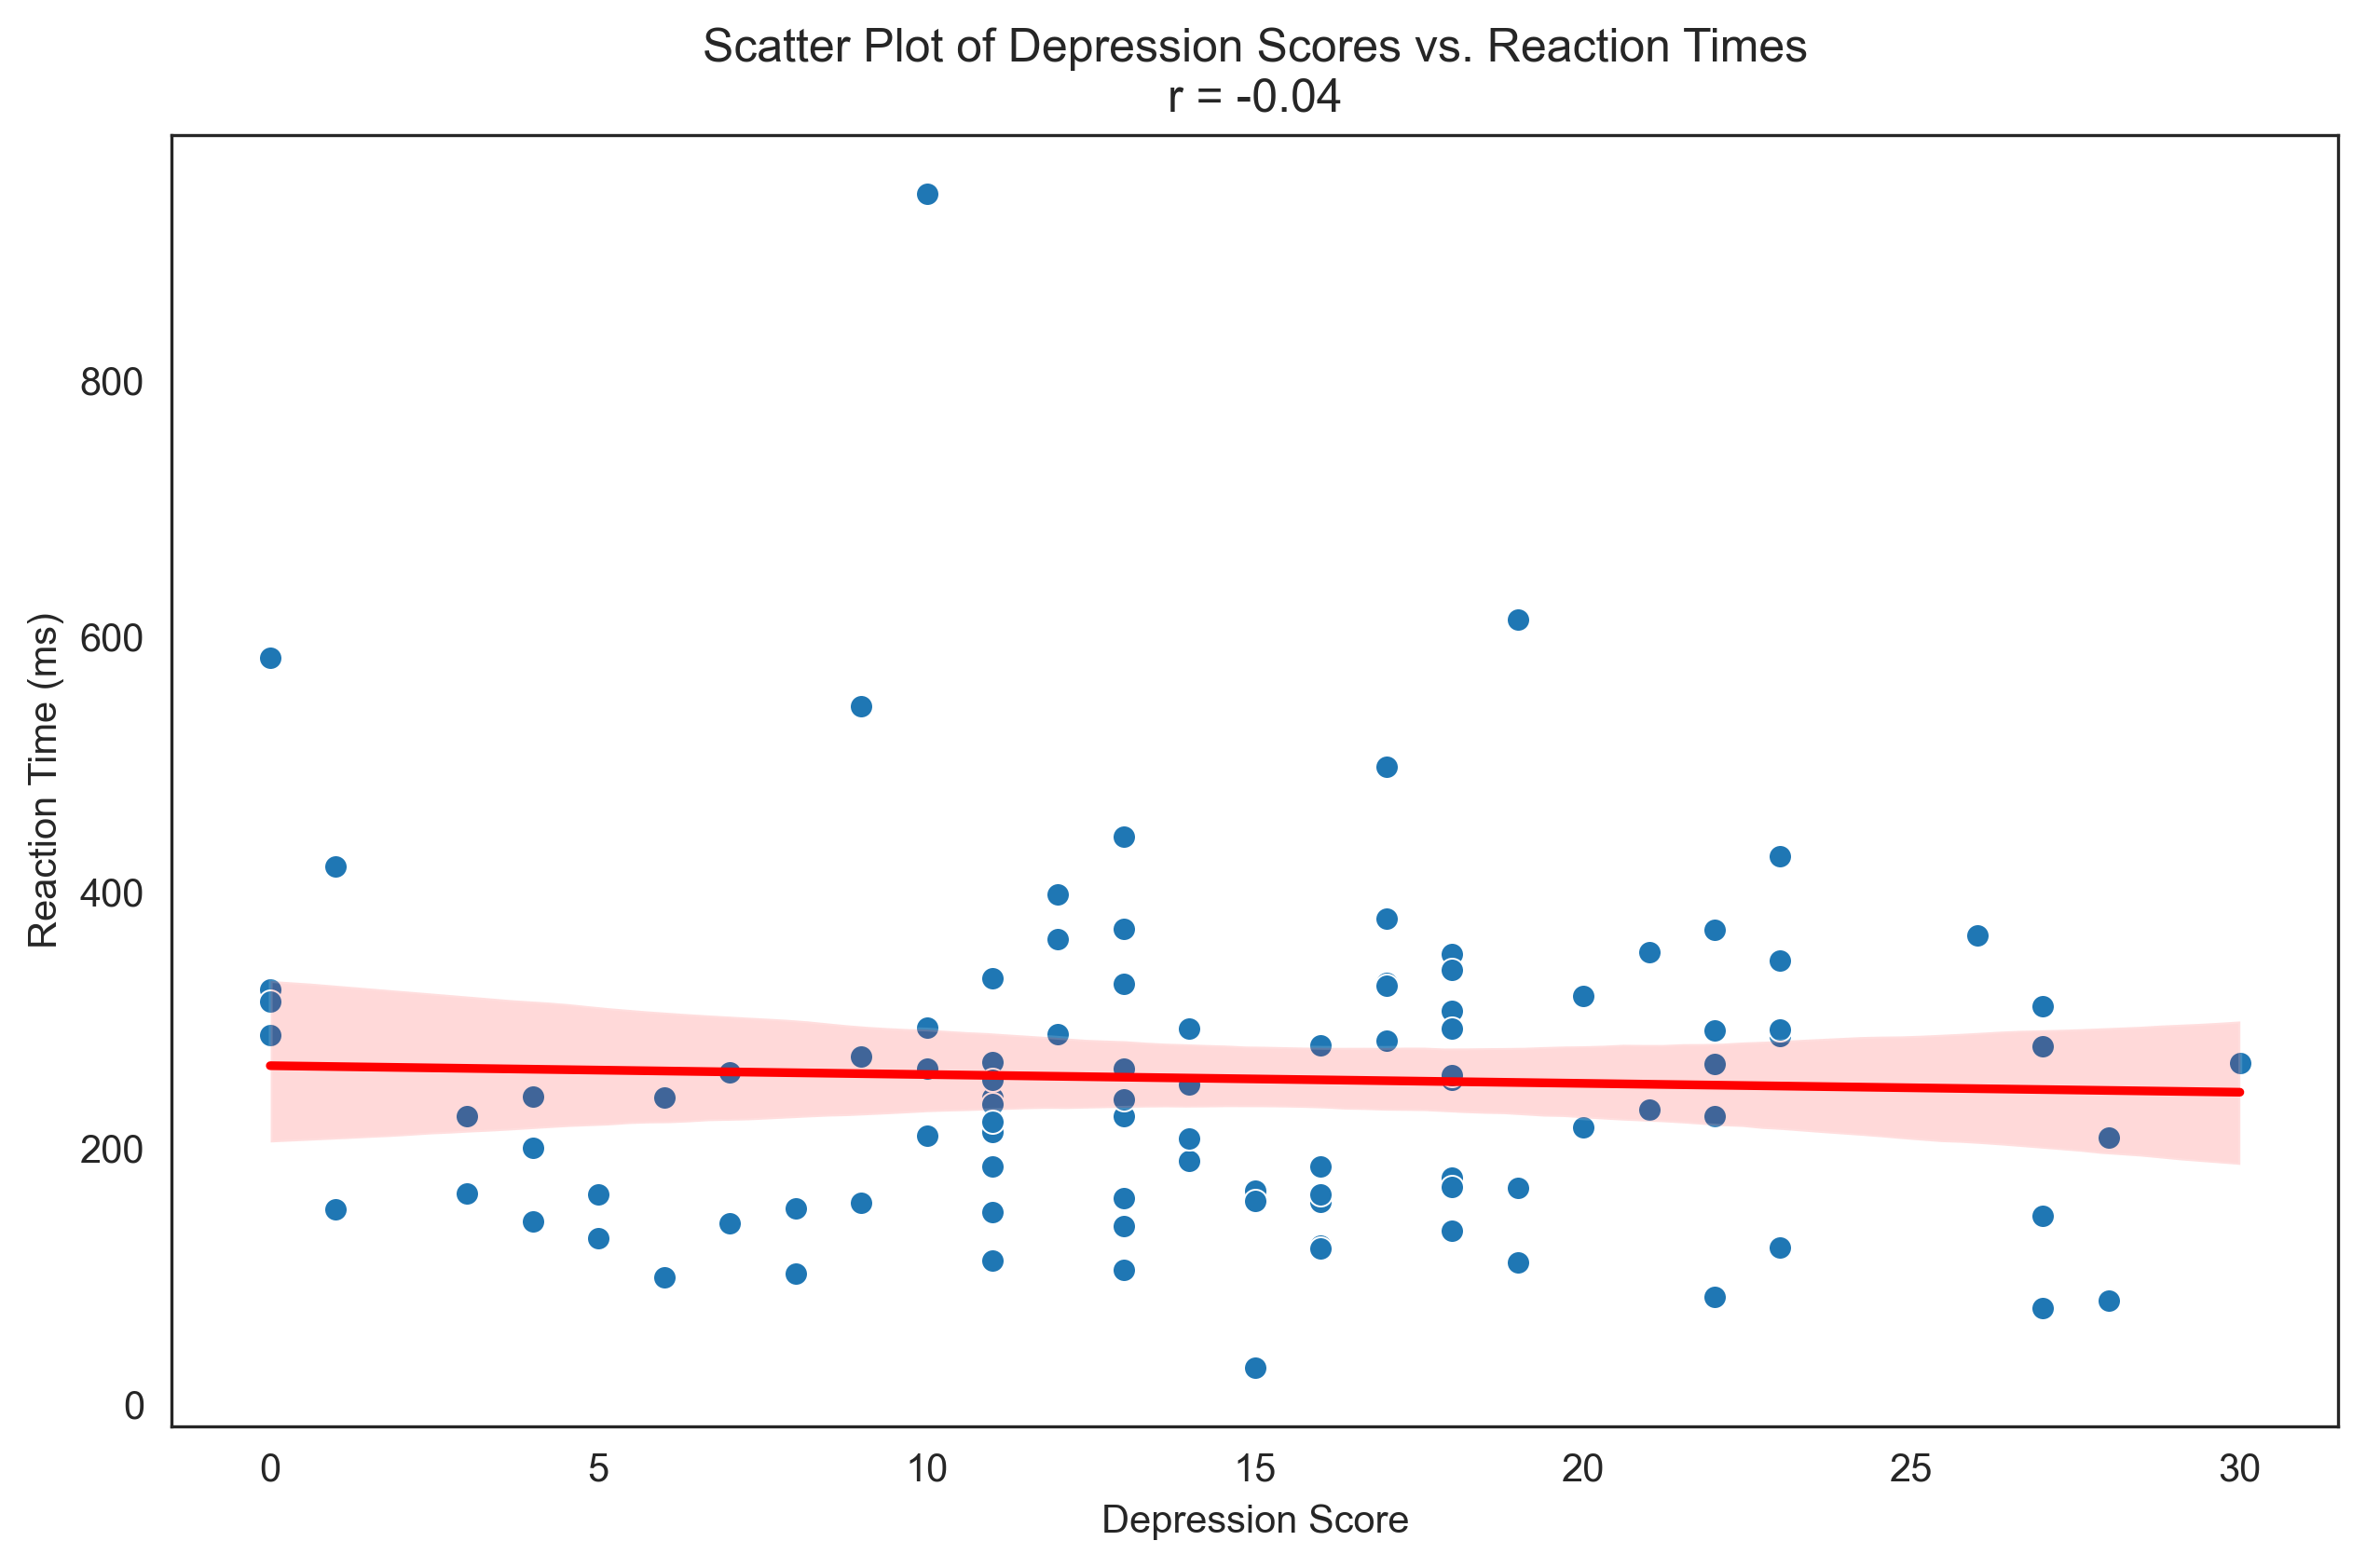

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=depression_scores, y=reaction_times)
plt.title(f'Scatter Plot of Depression Scores vs. Reaction Times\nr = {correlation:.2f}')
plt.xlabel('Depression Score')
plt.ylabel('Reaction Time (ms)')

# Add regression line
sns.regplot(x=depression_scores, y=reaction_times, scatter=False, color='red')

plt.show()

Now let's examine the relationship between categorical variables using a contingency table:

In [20]:
# Create a binary variable from depression scores (high/low)
depression_level = np.where(depression_scores > np.median(depression_scores), 'High', 'Low')

# Create a contingency table between depression level and satisfaction
contingency = pd.crosstab(depression_level, likert_responses, 
                          rownames=['Depression Level'], 
                          colnames=['Satisfaction Rating'])

# Add row and column totals
contingency.loc['Total'] = contingency.sum()
contingency['Total'] = contingency.sum(axis=1)

print("Contingency Table: Depression Level vs. Satisfaction Rating")
print(contingency)

# Calculate percentages
print("\nRow Percentages (percentages within each depression level):")
row_percentages = contingency.div(contingency['Total'], axis=0) * 100
print(row_percentages.drop('Total', axis=1).round(1))

Contingency Table: Depression Level vs. Satisfaction Rating
Satisfaction Rating   1   2   3   4   5  Total
Depression Level                              
High                  8   5  16  13   6     48
Low                   8   7  23   9   5     52
Total                16  12  39  22  11    100

Row Percentages (percentages within each depression level):
Satisfaction Rating     1     2     3     4     5
Depression Level                                 
High                 16.7  10.4  33.3  27.1  12.5
Low                  15.4  13.5  44.2  17.3   9.6
Total                16.0  12.0  39.0  22.0  11.0


Let's visualize this relationship with a grouped bar chart:

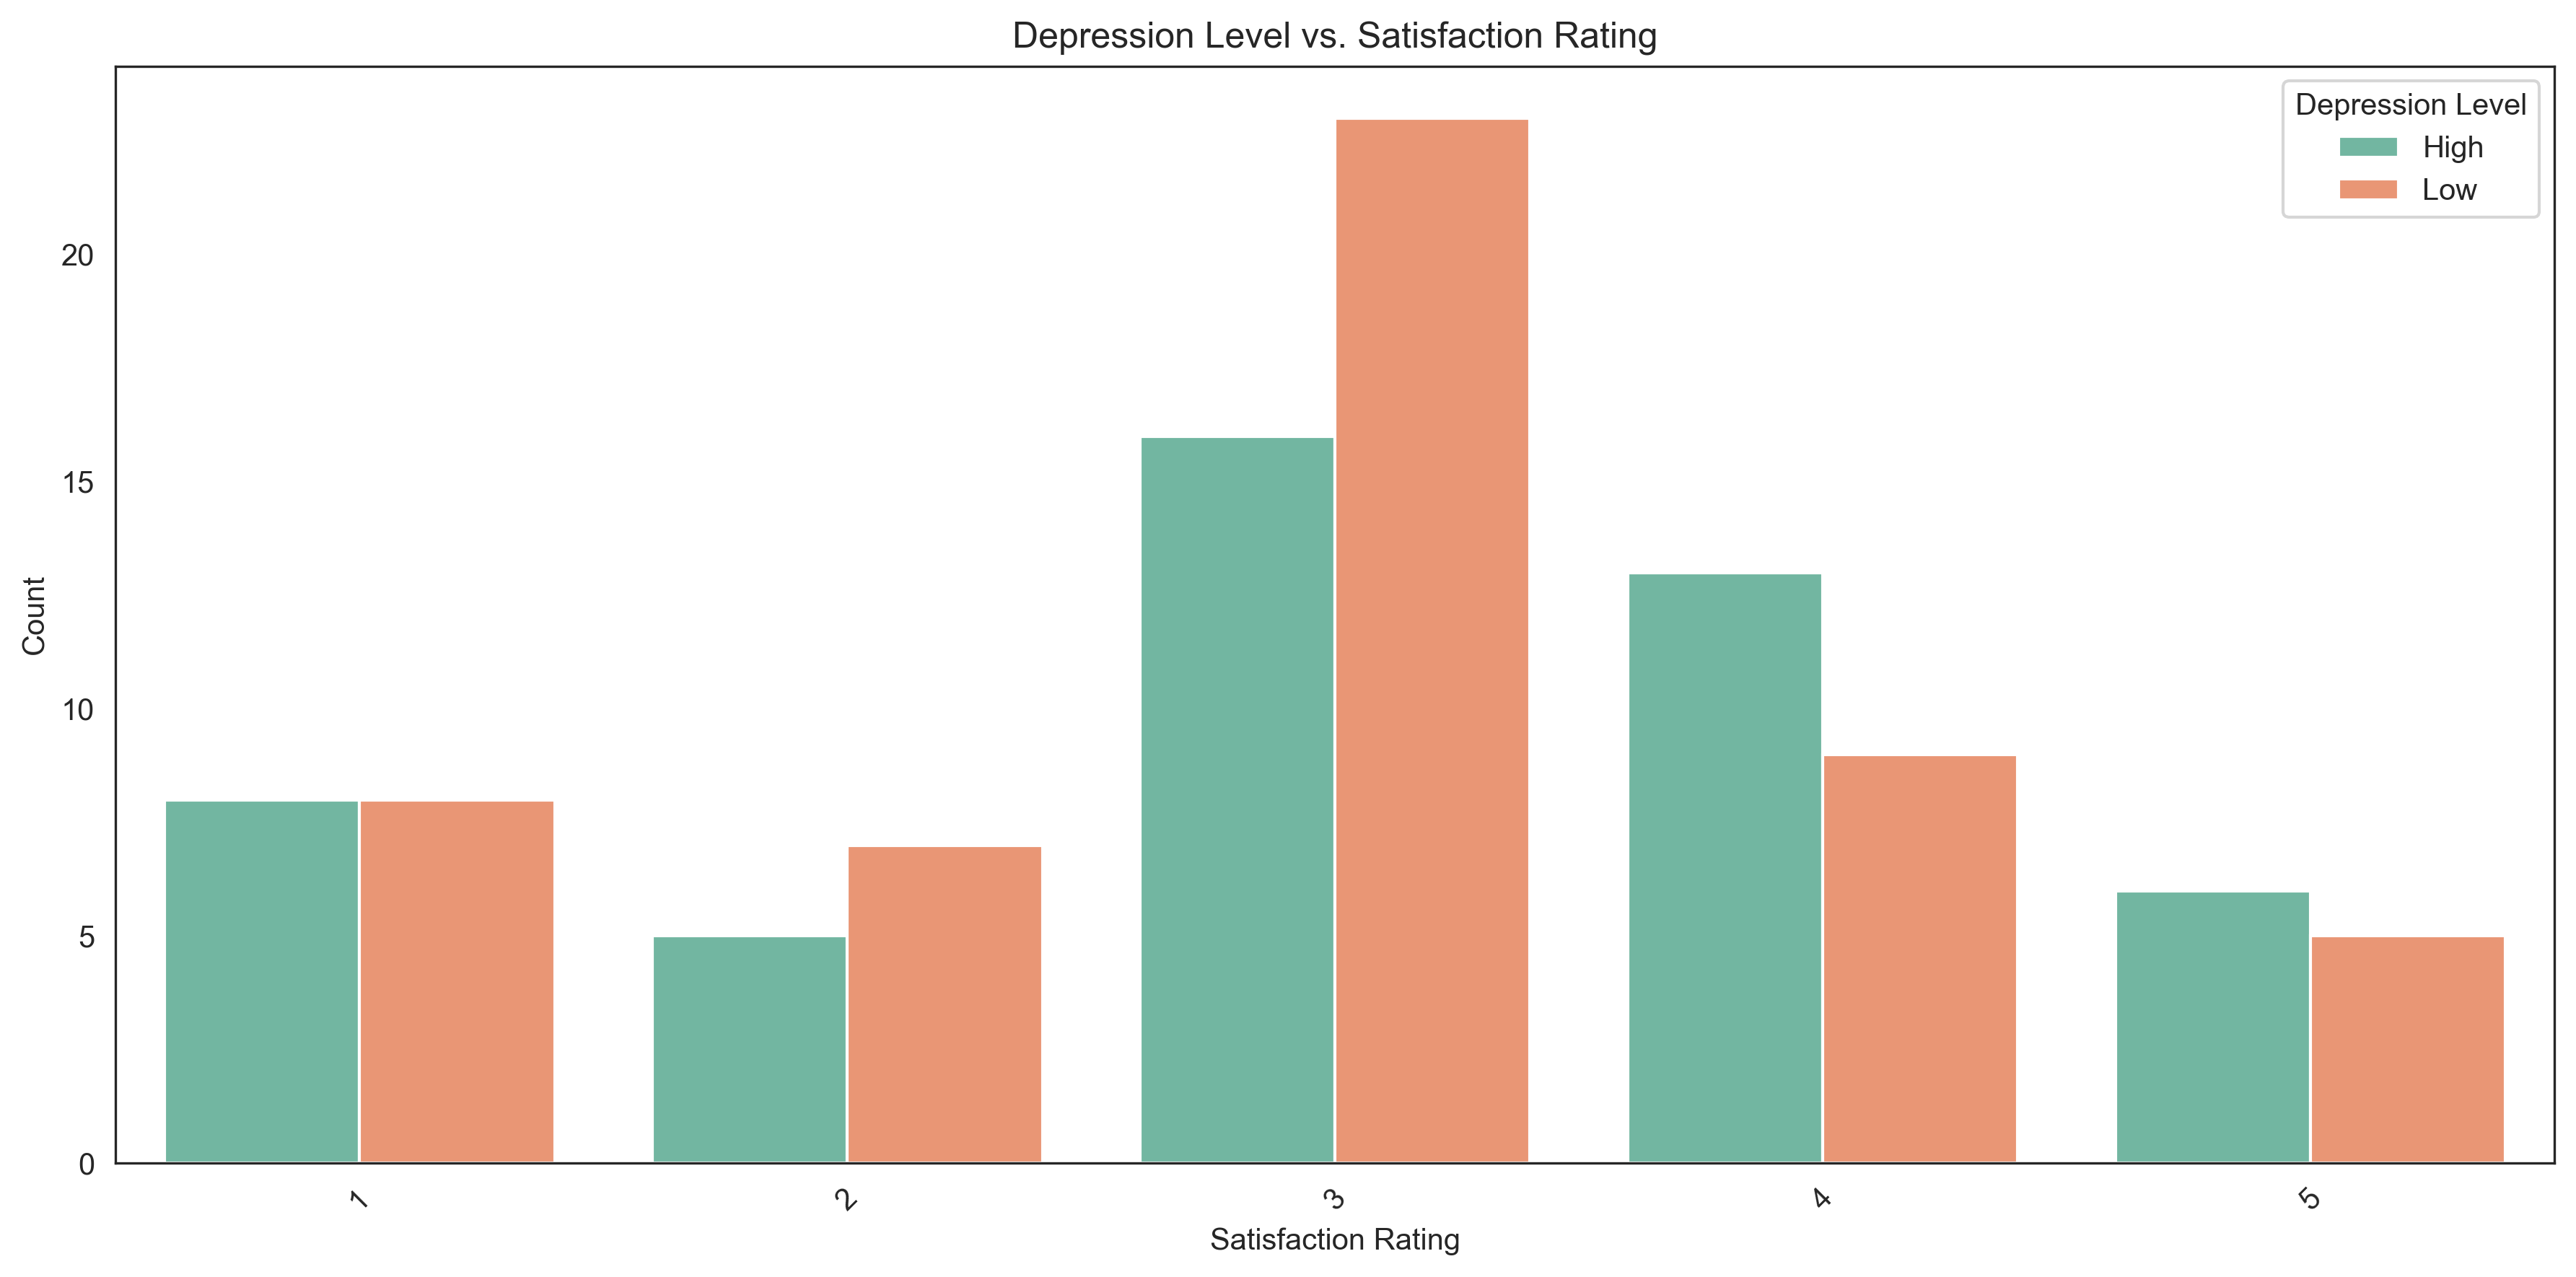

In [21]:
plt.figure(figsize=(12, 6))

# Convert contingency table to long format for seaborn
contingency_df = contingency.drop('Total', axis=1).drop('Total', axis=0).reset_index()
contingency_long = pd.melt(contingency_df, id_vars=['Depression Level'], 
                           var_name='Satisfaction Rating', value_name='Count')

# Create grouped bar chart
sns.barplot(x='Satisfaction Rating', y='Count', hue='Depression Level', data=contingency_long, palette='Set2')
plt.title('Depression Level vs. Satisfaction Rating')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.legend(title='Depression Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Effect Size Measures

Effect size measures quantify the magnitude of differences or relationships, regardless of sample size. They are crucial in psychological research for interpreting the practical significance of findings. Common effect size measures include:

1. **Cohen's d**: Standardized mean difference between two groups
2. **Correlation coefficient (r)**: Measure of relationship strength
3. **Eta-squared (η²)**: Proportion of variance explained in ANOVA
4. **Odds ratio**: Ratio of odds of an event in one group to the odds in another group

Let's calculate some effect sizes for our data:

In [22]:
# Split reaction times by condition
control_rt = reaction_times[conditions == 'Control']
treatment_a_rt = reaction_times[conditions == 'Treatment A']
treatment_b_rt = reaction_times[conditions == 'Treatment B']

# Calculate Cohen's d for Control vs. Treatment A
def cohens_d(group1, group2):
    # Pooled standard deviation
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    s_pooled = np.sqrt(((n1-1) * s1**2 + (n2-1) * s2**2) / (n1 + n2 - 2))
    
    # Effect size
    d = (np.mean(group1) - np.mean(group2)) / s_pooled
    return d

d_control_vs_a = cohens_d(control_rt, treatment_a_rt)
d_control_vs_b = cohens_d(control_rt, treatment_b_rt)
d_a_vs_b = cohens_d(treatment_a_rt, treatment_b_rt)

print("Effect Sizes (Cohen's d) for Reaction Times:")
print(f"Control vs. Treatment A: d = {d_control_vs_a:.3f}")
print(f"Control vs. Treatment B: d = {d_control_vs_b:.3f}")
print(f"Treatment A vs. Treatment B: d = {d_a_vs_b:.3f}")

# Interpret Cohen's d
def interpret_cohens_d(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "negligible effect"
    elif abs_d < 0.5:
        return "small effect"
    elif abs_d < 0.8:
        return "medium effect"
    else:
        return "large effect"

print("\nInterpretation:")
print(f"Control vs. Treatment A: {interpret_cohens_d(d_control_vs_a)}")
print(f"Control vs. Treatment B: {interpret_cohens_d(d_control_vs_b)}")
print(f"Treatment A vs. Treatment B: {interpret_cohens_d(d_a_vs_b)}")

Effect Sizes (Cohen's d) for Reaction Times:
Control vs. Treatment A: d = -0.035
Control vs. Treatment B: d = -0.267
Treatment A vs. Treatment B: d = -0.244

Interpretation:
Control vs. Treatment A: negligible effect
Control vs. Treatment B: small effect
Treatment A vs. Treatment B: small effect


Let's visualize these differences with box plots:

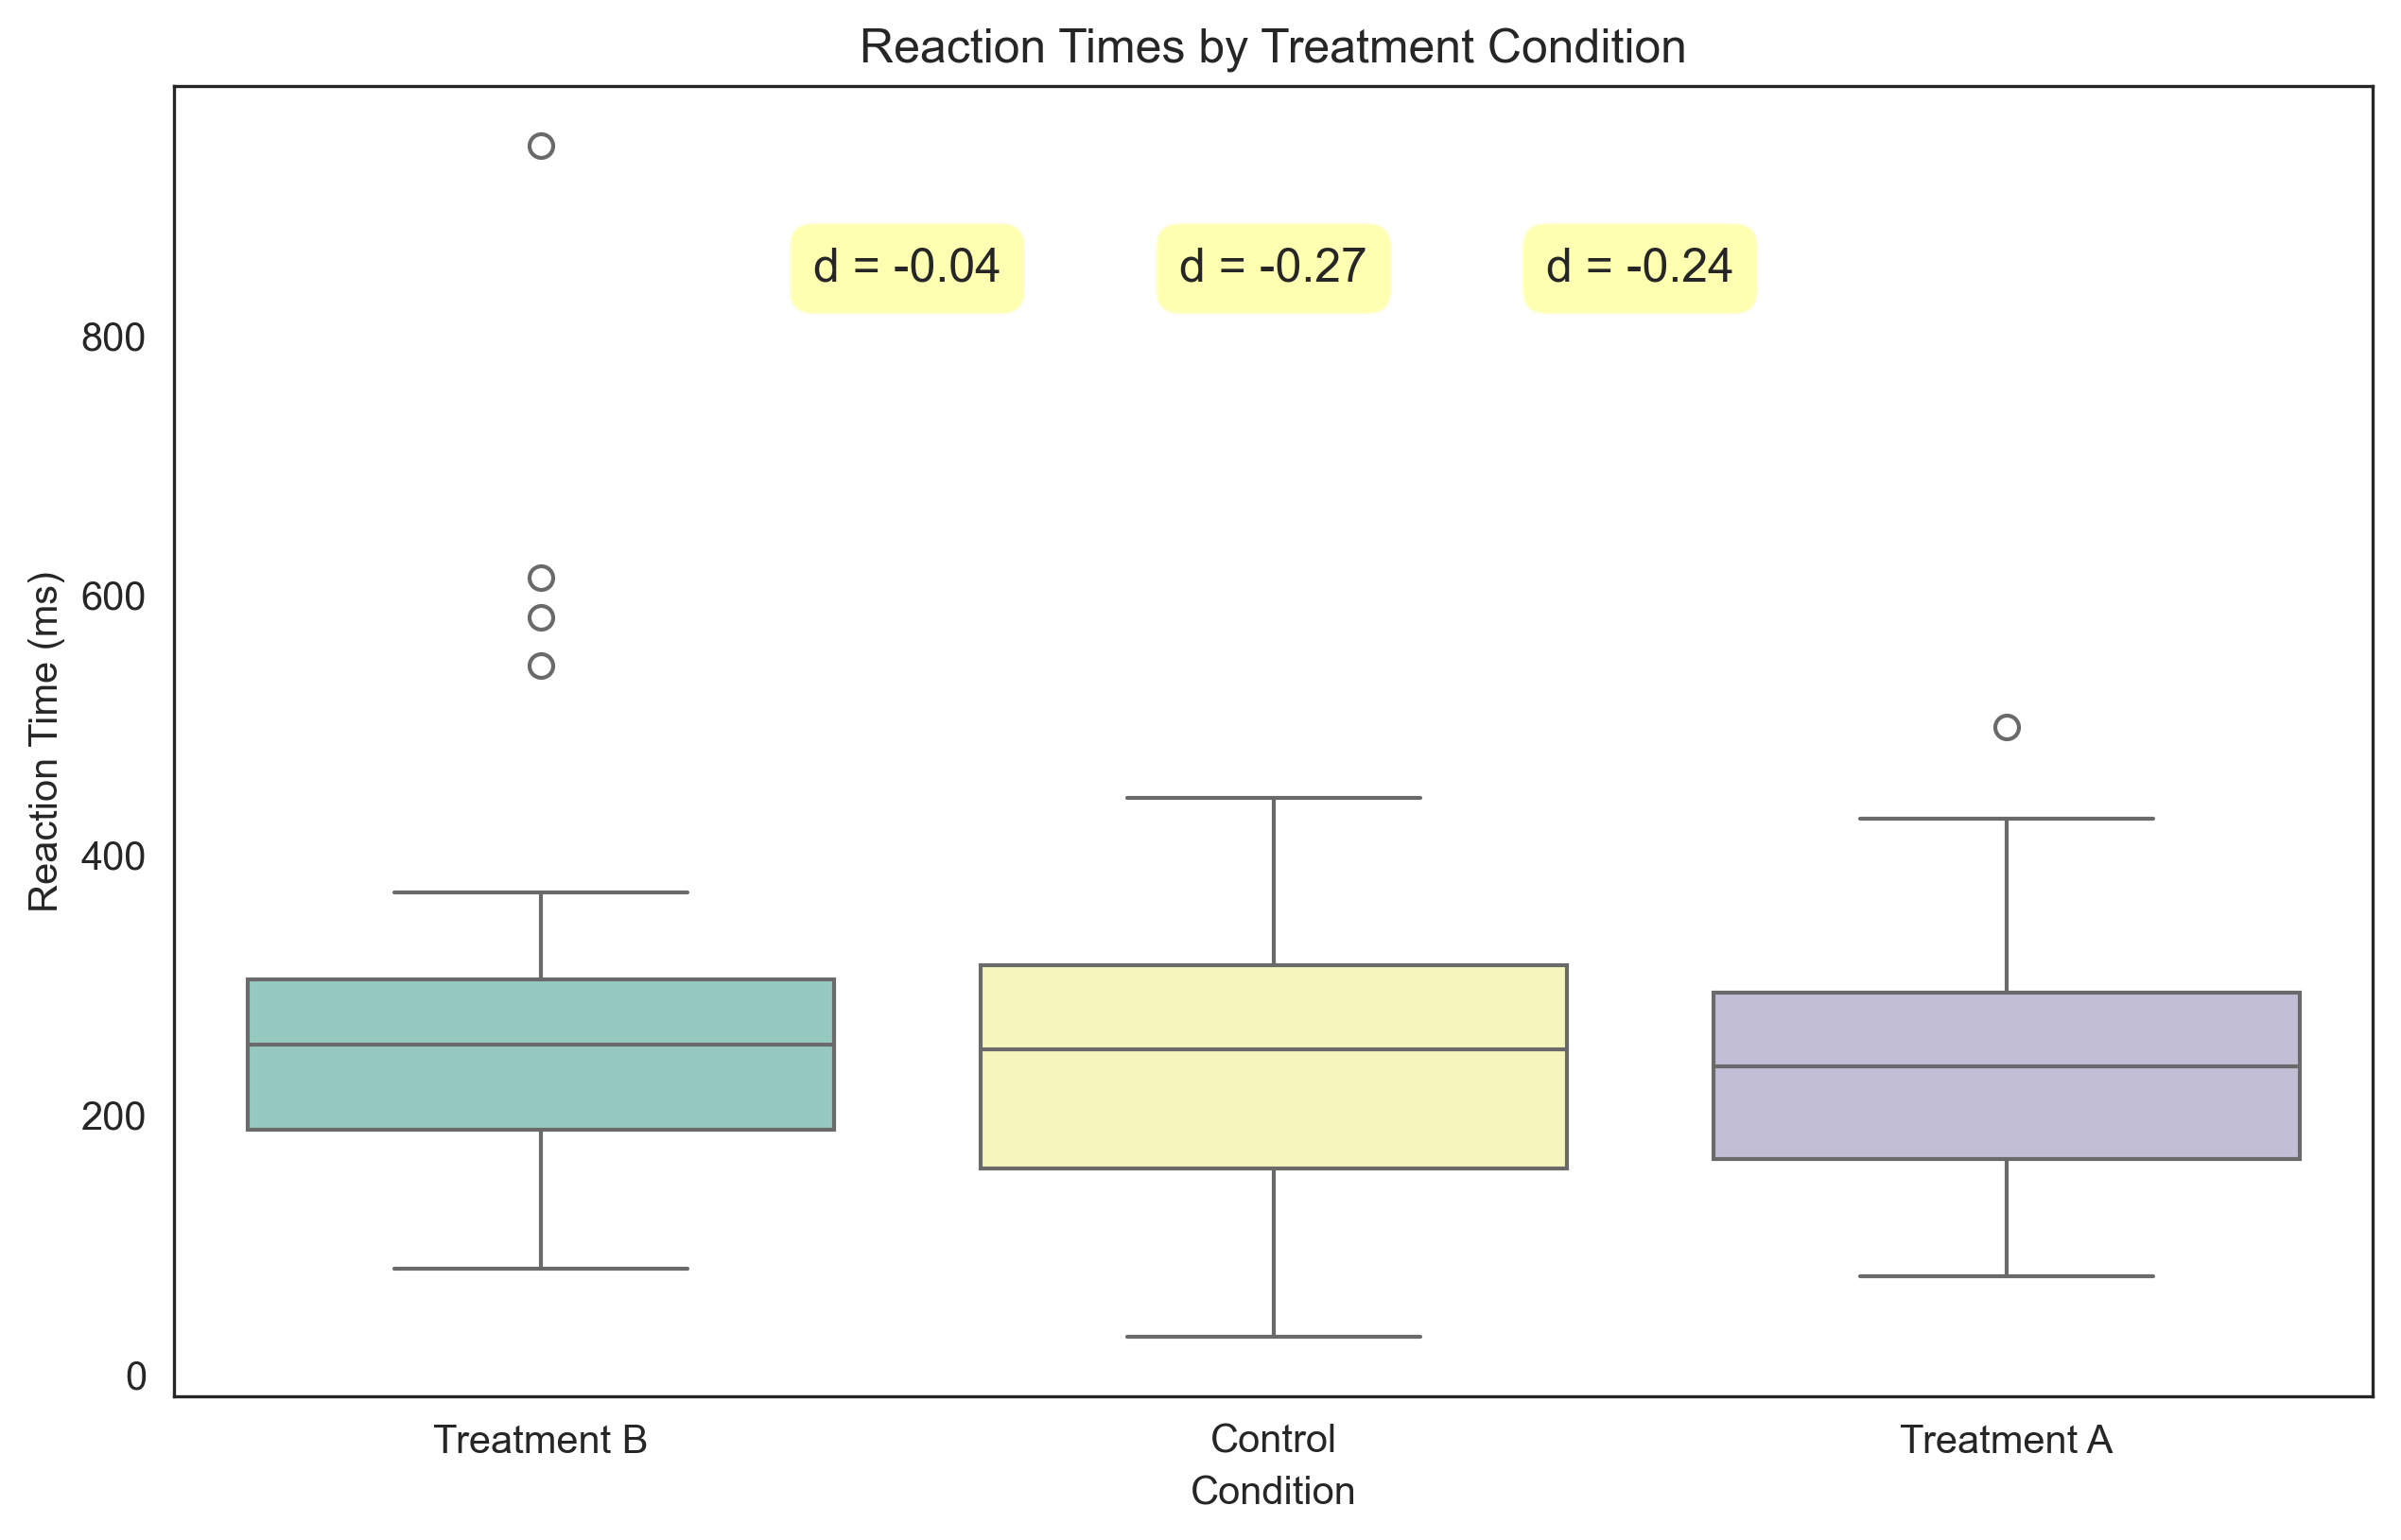

In [23]:
plt.figure(figsize=(10, 6))

# Create a DataFrame for plotting
condition_rt_df = pd.DataFrame({
    'Reaction Time': reaction_times,
    'Condition': conditions
})

# Create box plots - fix the deprecation warning by using hue parameter
sns.boxplot(x='Condition', y='Reaction Time', hue='Condition', data=condition_rt_df, palette='Set3', legend=False)
plt.title('Reaction Times by Treatment Condition')
plt.xlabel('Condition')
plt.ylabel('Reaction Time (ms)')

# Add effect size annotations
plt.annotate(f"d = {d_control_vs_a:.2f}", xy=(0.5, np.max(reaction_times)*0.9),
             ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.annotate(f"d = {d_control_vs_b:.2f}", xy=(1, np.max(reaction_times)*0.9),
             ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.annotate(f"d = {d_a_vs_b:.2f}", xy=(1.5, np.max(reaction_times)*0.9),
             ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

plt.show()

## Summary

In this chapter, we've explored descriptive statistics, which are essential tools for summarizing and understanding psychological data. We've covered:

1. **Types of Data**: Nominal, ordinal, interval, and ratio scales
2. **Measures of Central Tendency**: Mean, median, and mode
3. **Measures of Variability**: Range, IQR, variance, and standard deviation
4. **Measures of Position**: Percentiles, quartiles, and z-scores
5. **Measures of Shape**: Skewness and kurtosis
6. **Frequency Distributions**: Tables and visualizations
7. **Bivariate Statistics**: Covariance, correlation, and contingency tables
8. **Effect Size Measures**: Cohen's d and correlation coefficient

These descriptive statistics provide the foundation for understanding and communicating patterns in psychological data. They help researchers summarize complex datasets, identify important features, and prepare for more advanced statistical analyses.

Remember that the choice of descriptive statistics should be guided by the type of data and research questions. Different measures are appropriate for different types of variables and distributions. By mastering these descriptive techniques, psychologists can effectively explore their data and communicate their findings clearly and accurately.

## Practice Problems

1. A researcher measures anxiety levels (on a scale from 0-50) for 10 participants: 12, 15, 8, 22, 19, 25, 10, 16, 18, 30. Calculate the mean, median, range, and standard deviation.

2. In a memory experiment, participants recalled the following number of words: 5, 8, 12, 7, 9, 10, 6, 11. Calculate the z-score for the participant who recalled 12 words.

3. A psychologist measures reaction times (in milliseconds) for two groups:
   - Group A: 245, 256, 278, 290, 310, 265, 272
   - Group B: 310, 295, 325, 332, 318, 302, 340


## Practice Problems

1. A researcher measures anxiety levels (on a scale from 0-50) for 10 participants: 12, 15, 8, 22, 19, 25, 10, 16, 18, 30. Calculate the mean, median, range, and standard deviation.

2. In a memory experiment, participants recalled the following number of words: 5, 8, 12, 7, 9, 10, 6, 11. Calculate the z-score for the participant who recalled 12 words.

3. A psychologist measures reaction times (in milliseconds) for two groups:
   - Group A: 245, 256, 278, 290, 310, 265, 272
   - Group B: 310, 295, 325, 332, 318, 302, 340
   
   Calculate the mean and standard deviation for each group, and then calculate Cohen's d to quantify the effect size of the difference between groups.

4. A survey asks participants to rate their satisfaction with a therapy program on a 5-point Likert scale. The results are: 3, 4, 5, 3, 2, 4, 3, 5, 4, 3, 4, 2, 3, 4, 5. Create a frequency table showing the count, relative frequency, and cumulative relative frequency for each rating.

5. A researcher collects data on depression scores and hours of exercise per week for 8 participants:
   
   | Participant | Depression Score | Exercise (hours/week) |
   |-------------|------------------|------------------------|
   | 1           | 15               | 3                      |
   | 2           | 10               | 5                      |
   | 3           | 22               | 1                      |
   | 4           | 18               | 2                      |
   | 5           | 12               | 4                      |
   | 6           | 20               | 2                      |
   | 7           | 8                | 6                      |
   | 8           | 16               | 3                      |
   
   Calculate the correlation coefficient between depression scores and hours of exercise. Interpret the strength and direction of the relationship.

## Solutions to Practice Problems

### Problem 1: Anxiety Levels

Given data: 12, 15, 8, 22, 19, 25, 10, 16, 18, 30

In [24]:
import numpy as np

anxiety = np.array([12, 15, 8, 22, 19, 25, 10, 16, 18, 30])

# Mean
mean_anxiety = np.mean(anxiety)

# Median
median_anxiety = np.median(anxiety)

# Range
range_anxiety = np.max(anxiety) - np.min(anxiety)

# Standard deviation
std_anxiety = np.std(anxiety, ddof=1)  # ddof=1 for sample standard deviation

print(f"Mean: {mean_anxiety}")
print(f"Median: {median_anxiety}")
print(f"Range: {range_anxiety}")
print(f"Standard Deviation: {std_anxiety:.2f}")

Mean: 17.5
Median: 17.0
Range: 22
Standard Deviation: 6.84


### Problem 2: Memory Experiment Z-Score

Given data: 5, 8, 12, 7, 9, 10, 6, 11

In [25]:
memory = np.array([5, 8, 12, 7, 9, 10, 6, 11])

# Mean and standard deviation
mean_memory = np.mean(memory)
std_memory = np.std(memory, ddof=1)

# Z-score for 12 words
z_score_12 = (12 - mean_memory) / std_memory

print(f"Mean: {mean_memory}")
print(f"Standard Deviation: {std_memory:.2f}")
print(f"Z-score for 12 words: {z_score_12:.2f}")
print(f"Interpretation: The participant who recalled 12 words scored {z_score_12:.2f} standard deviations above the mean.")

Mean: 8.5
Standard Deviation: 2.45
Z-score for 12 words: 1.43
Interpretation: The participant who recalled 12 words scored 1.43 standard deviations above the mean.


### Problem 3: Reaction Times and Cohen's d

Group A: 245, 256, 278, 290, 310, 265, 272
Group B: 310, 295, 325, 332, 318, 302, 340

In [26]:
group_a = np.array([245, 256, 278, 290, 310, 265, 272])
group_b = np.array([310, 295, 325, 332, 318, 302, 340])

# Mean and standard deviation for each group
mean_a = np.mean(group_a)
std_a = np.std(group_a, ddof=1)

mean_b = np.mean(group_b)
std_b = np.std(group_b, ddof=1)

# Calculate Cohen's d
# Pooled standard deviation
n_a, n_b = len(group_a), len(group_b)
s_pooled = np.sqrt(((n_a-1) * std_a**2 + (n_b-1) * std_b**2) / (n_a + n_b - 2))

# Effect size
cohens_d = (mean_b - mean_a) / s_pooled

print(f"Group A - Mean: {mean_a:.2f} ms, Standard Deviation: {std_a:.2f} ms")
print(f"Group B - Mean: {mean_b:.2f} ms, Standard Deviation: {std_b:.2f} ms")
print(f"Cohen's d: {cohens_d:.2f}")

# Interpret Cohen's d
if abs(cohens_d) < 0.2:
    interpretation = "negligible"
elif abs(cohens_d) < 0.5:
    interpretation = "small"
elif abs(cohens_d) < 0.8:
    interpretation = "medium"
else:
    interpretation = "large"

print(f"Interpretation: The effect size is {interpretation} (d = {cohens_d:.2f}).")
print(f"Group B has reaction times that are {cohens_d:.2f} standard deviations higher than Group A.")

Group A - Mean: 273.71 ms, Standard Deviation: 21.67 ms
Group B - Mean: 317.43 ms, Standard Deviation: 16.21 ms
Cohen's d: 2.28
Interpretation: The effect size is large (d = 2.28).
Group B has reaction times that are 2.28 standard deviations higher than Group A.


### Problem 4: Satisfaction Ratings Frequency Table

Given data: 3, 4, 5, 3, 2, 4, 3, 5, 4, 3, 4, 2, 3, 4, 5

Frequency Table for Satisfaction Ratings:
   Rating  Count  Relative Frequency  Cumulative Relative Frequency
2       2      2            0.133333                       0.133333
3       3      5            0.333333                       0.466667
4       4      5            0.333333                       0.800000
5       5      3            0.200000                       1.000000


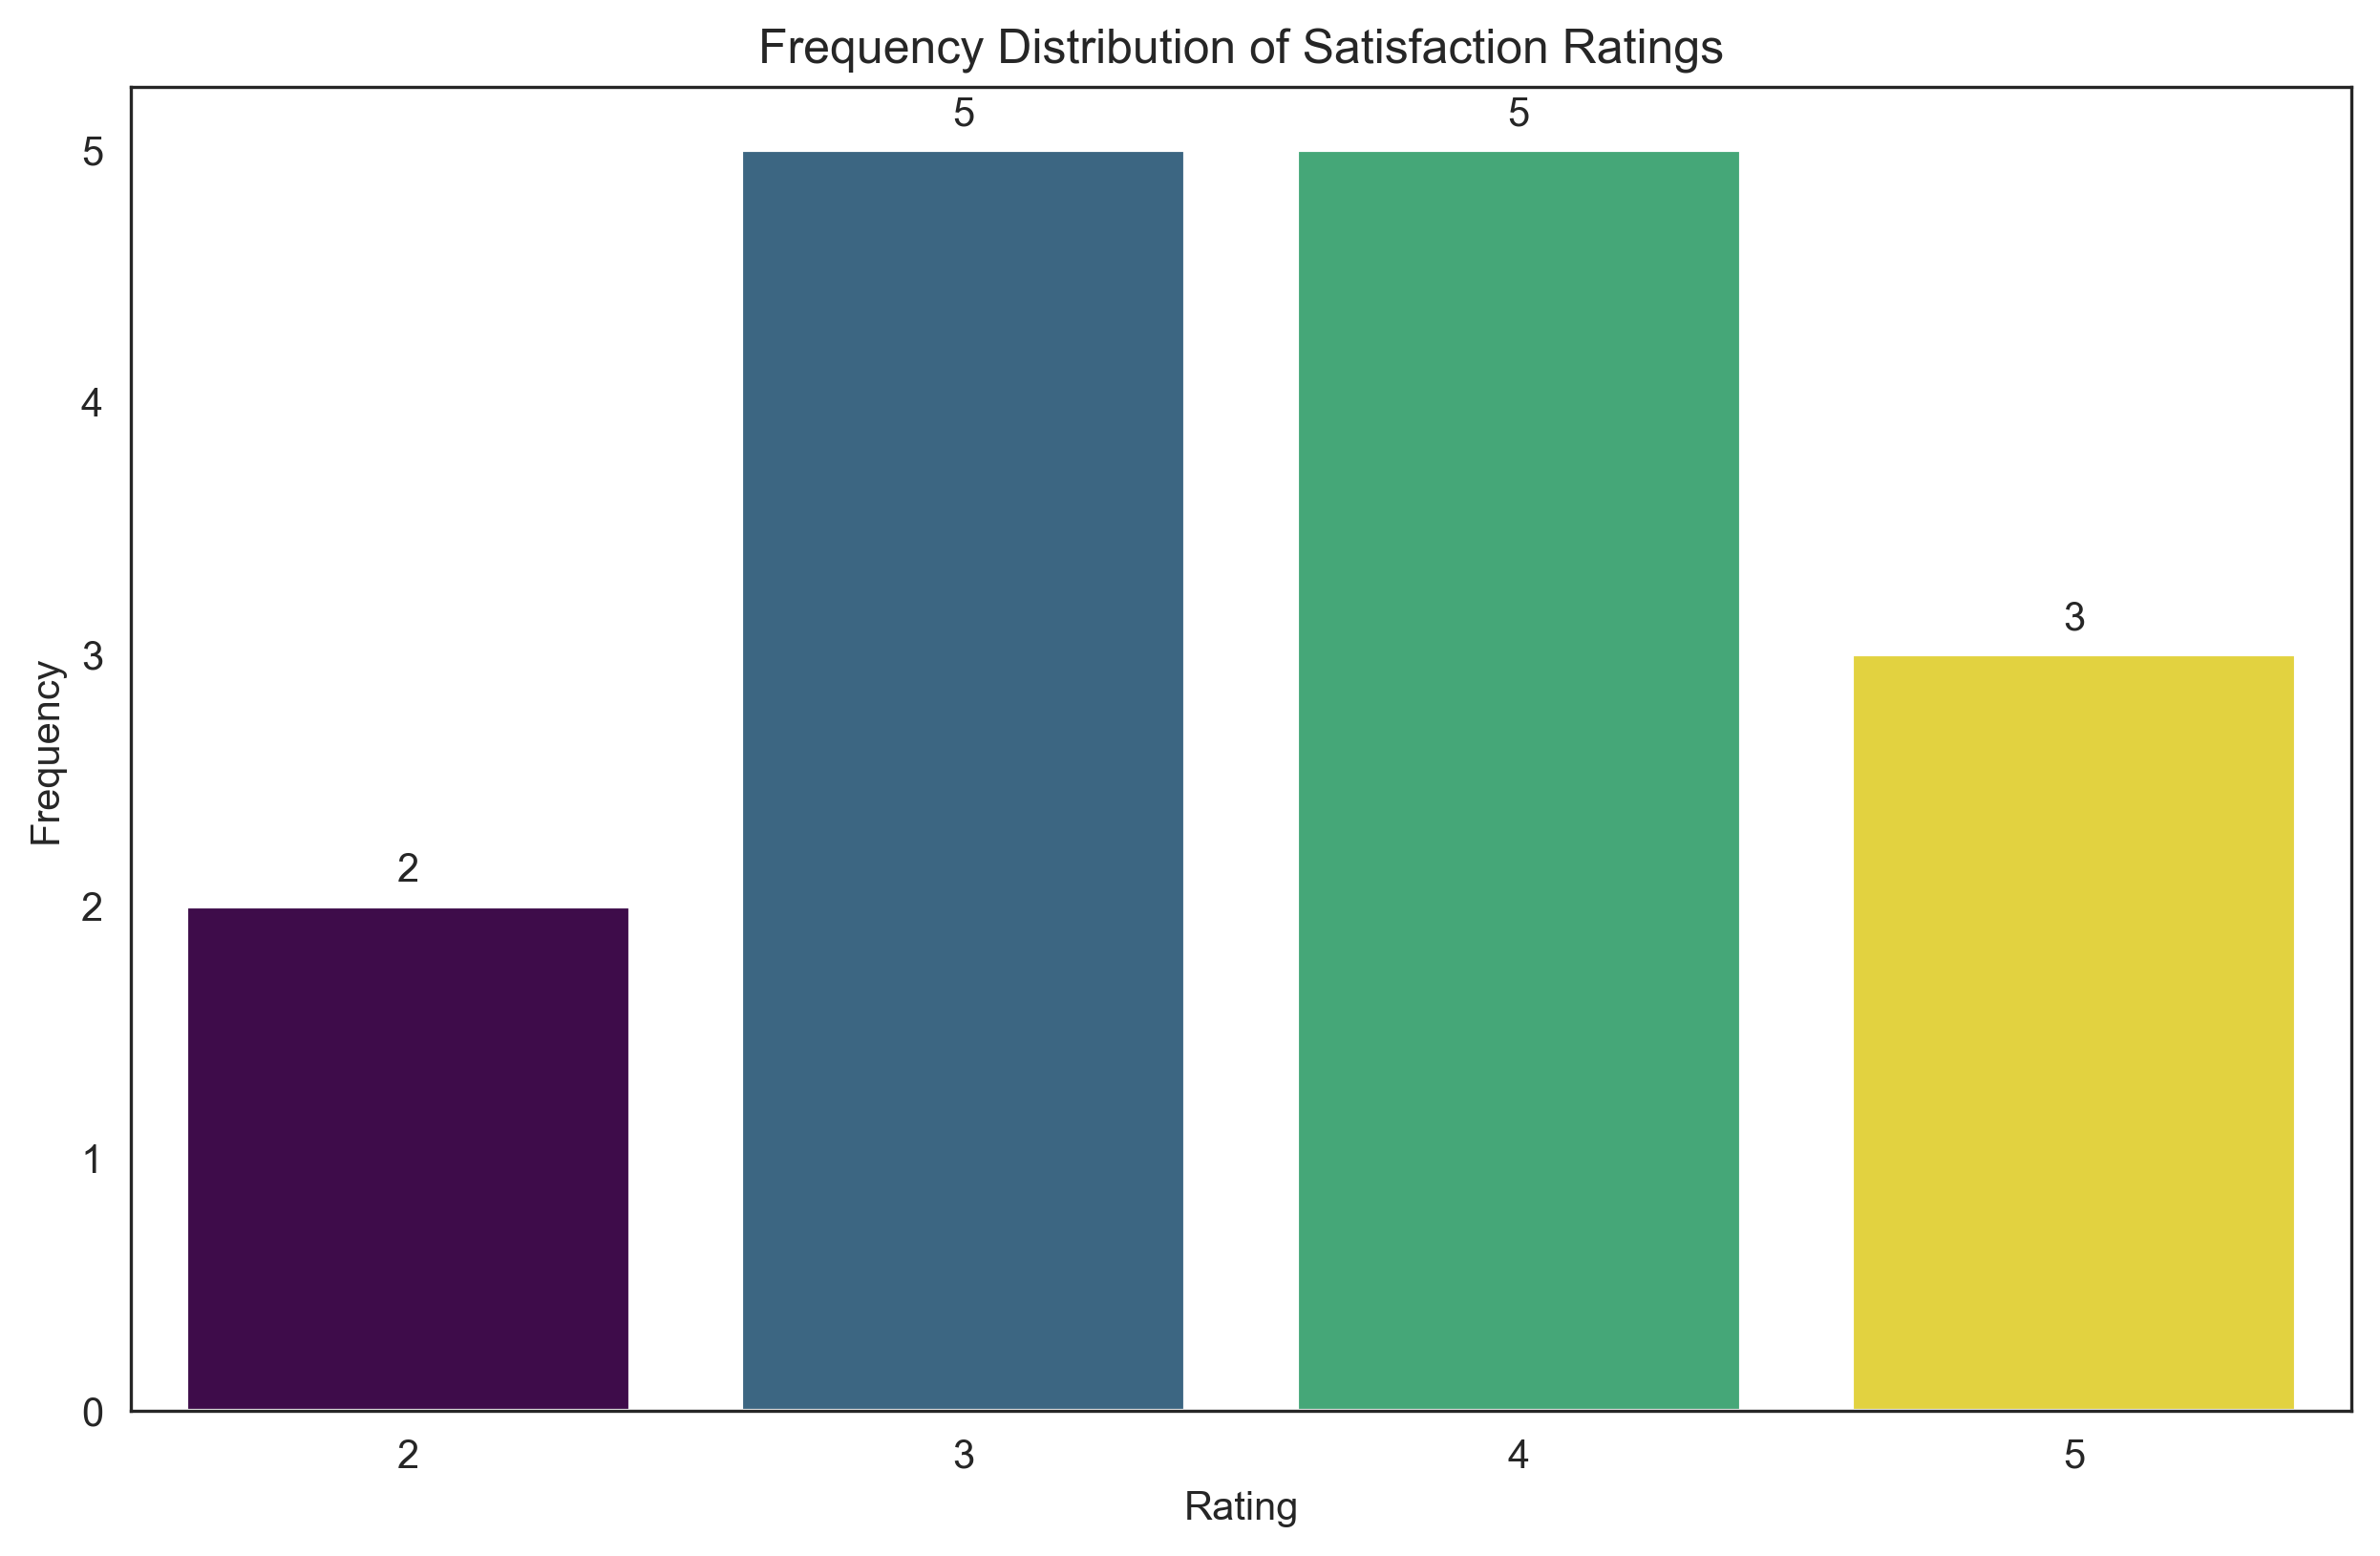

In [27]:
import pandas as pd

satisfaction = np.array([3, 4, 5, 3, 2, 4, 3, 5, 4, 3, 4, 2, 3, 4, 5])

# Create frequency table
freq = pd.Series(satisfaction).value_counts().sort_index()
rel_freq = freq / len(satisfaction)
cum_rel_freq = np.cumsum(rel_freq)

# Create DataFrame
freq_table = pd.DataFrame({
    'Rating': freq.index,
    'Count': freq.values,
    'Relative Frequency': rel_freq.values,
    'Cumulative Relative Frequency': cum_rel_freq
})

print("Frequency Table for Satisfaction Ratings:")
print(freq_table)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("white")
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off

# Fix the deprecation warning by using hue parameter with legend=False
sns.barplot(x='Rating', y='Count', hue='Rating', data=freq_table, palette='viridis', legend=False)
plt.title('Frequency Distribution of Satisfaction Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

for i, count in enumerate(freq_table['Count']):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

### Problem 5: Correlation between Depression and Exercise

Correlation coefficient: -0.99
Interpretation: There is a very strong negative correlation between depression scores and hours of exercise.
This suggests that as hours of exercise increase, depression scores tend to decrease.
The coefficient of determination (r²) is 0.97, meaning approximately 97.2% of the variance in depression scores can be explained by hours of exercise (or vice versa).


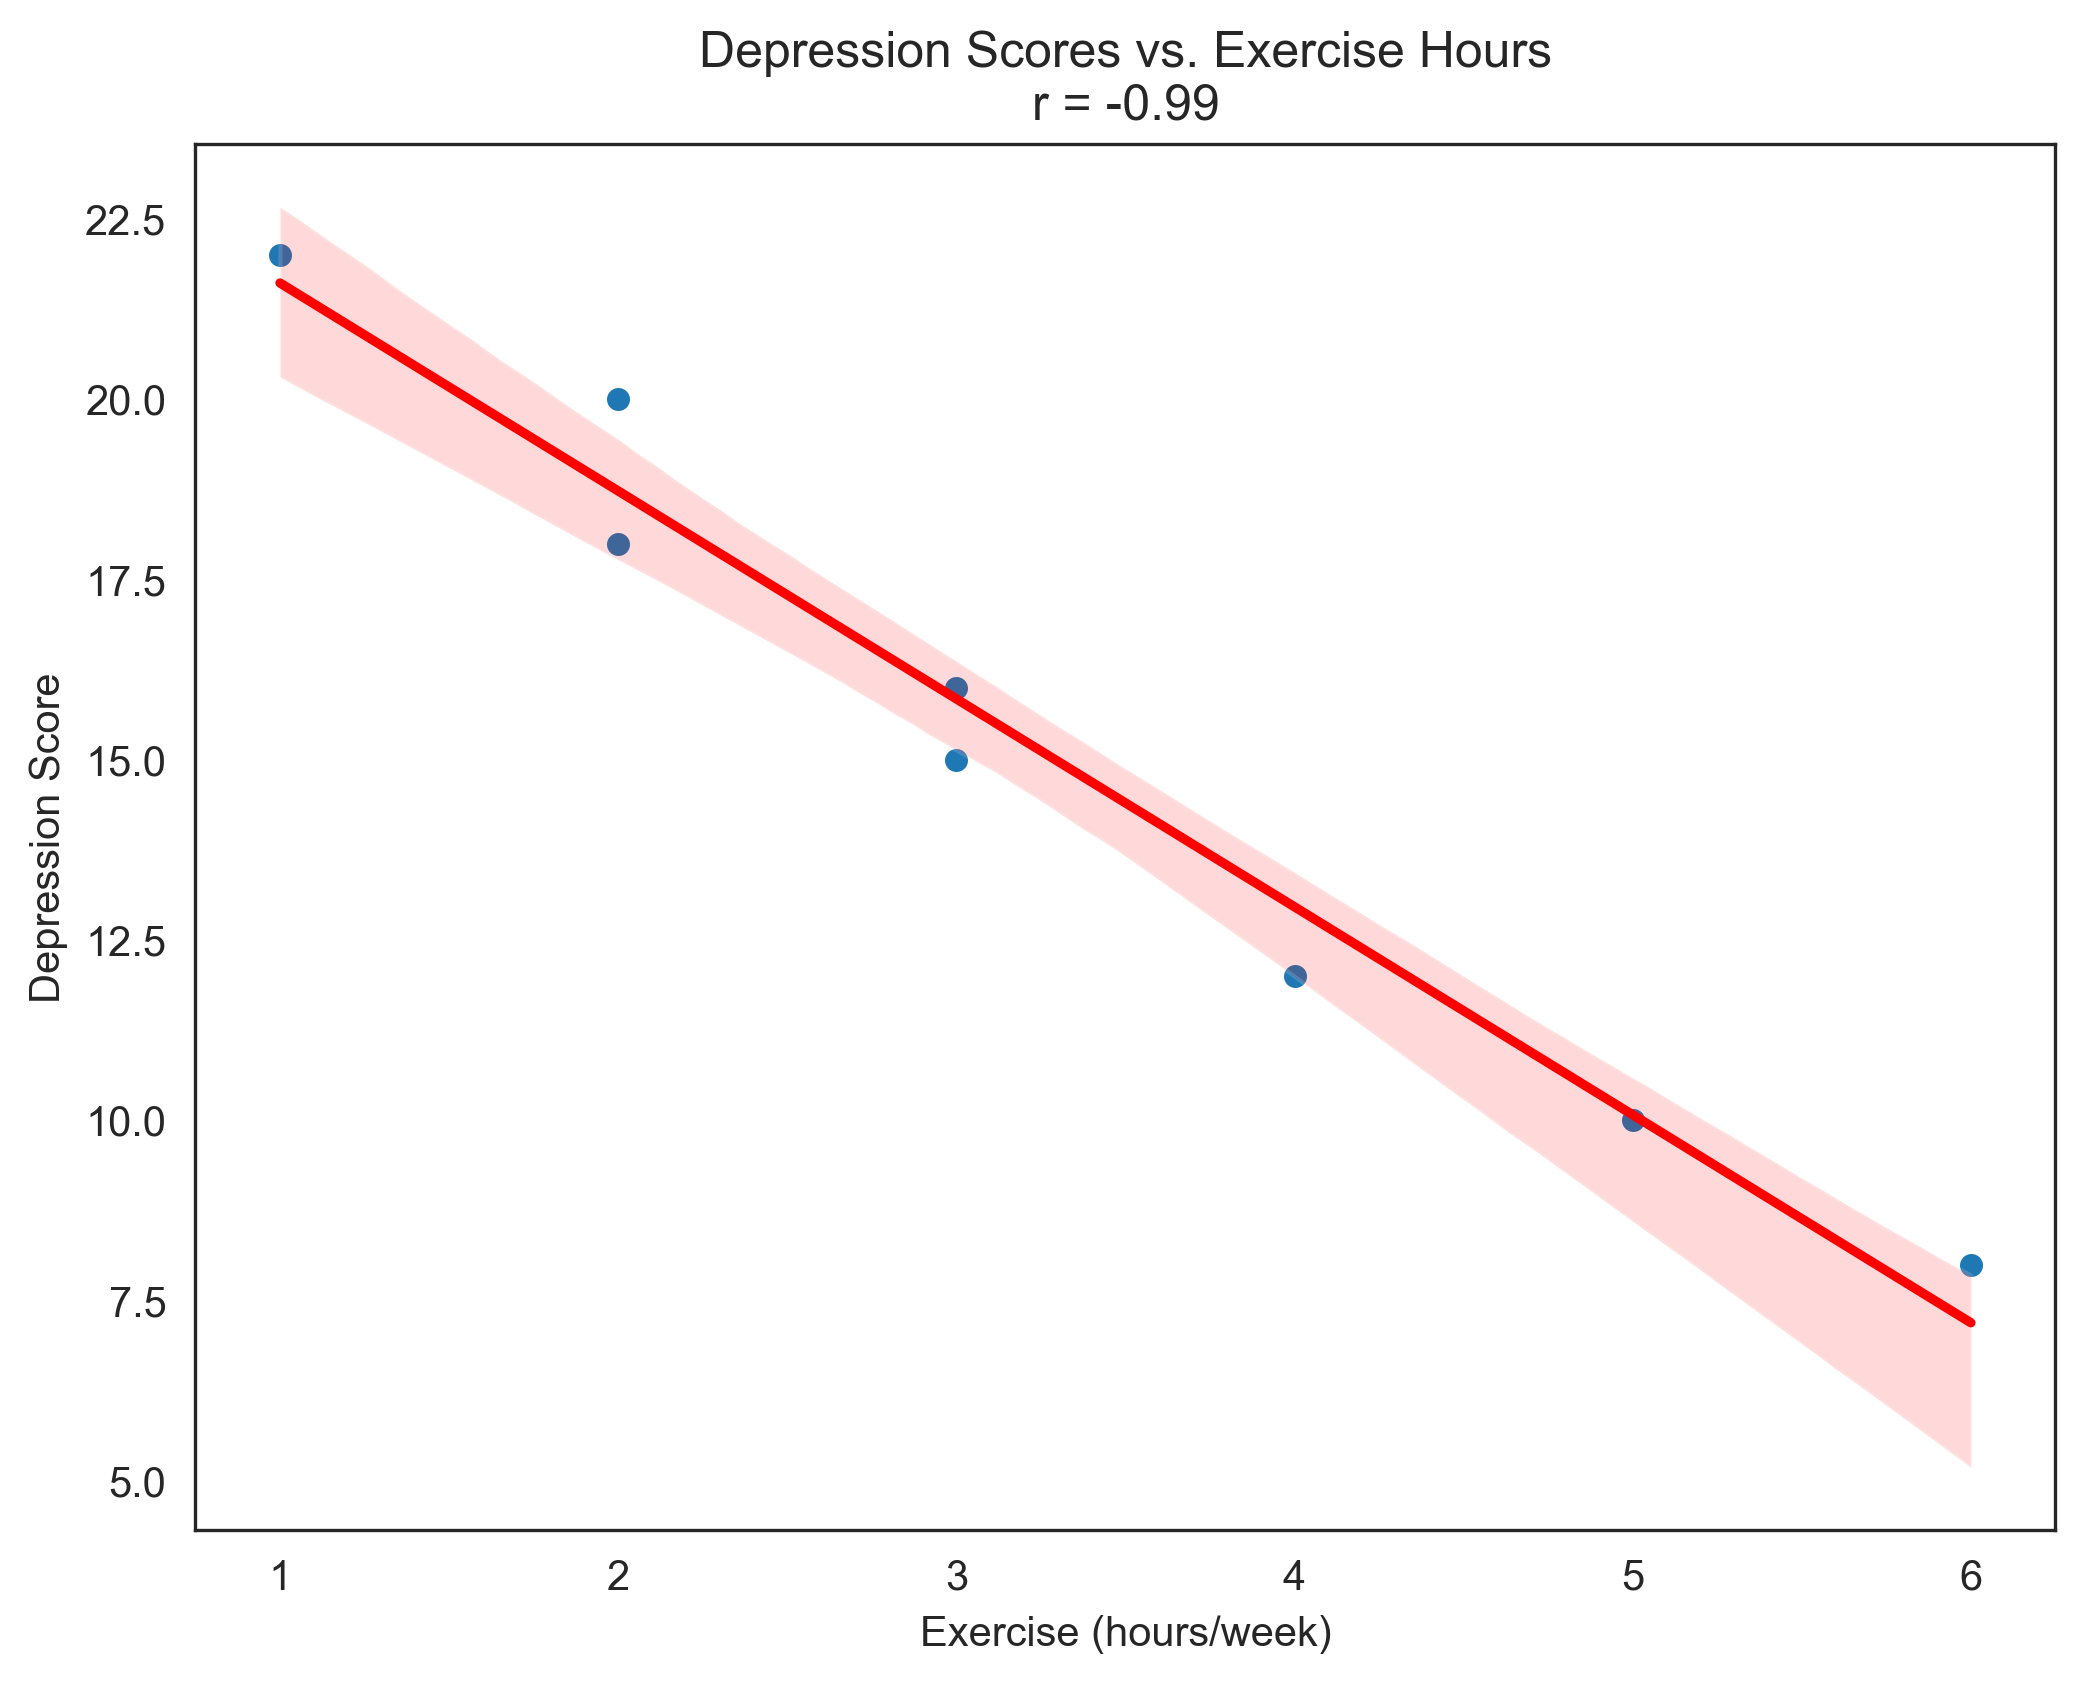

In [28]:
depression = np.array([15, 10, 22, 18, 12, 20, 8, 16])
exercise = np.array([3, 5, 1, 2, 4, 2, 6, 3])

# Calculate correlation coefficient
correlation = np.corrcoef(depression, exercise)[0, 1]

print(f"Correlation coefficient: {correlation:.2f}")

# Interpret correlation
if abs(correlation) < 0.1:
    strength = "negligible"
elif abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.5:
    strength = "moderate"
elif abs(correlation) < 0.7:
    strength = "strong"
else:
    strength = "very strong"
    
direction = "positive" if correlation > 0 else "negative"

print(f"Interpretation: There is a {strength} {direction} correlation between depression scores and hours of exercise.")
print(f"This suggests that as hours of exercise increase, depression scores tend to {('increase' if correlation > 0 else 'decrease')}.")
print(f"The coefficient of determination (r²) is {correlation**2:.2f}, meaning approximately {correlation**2*100:.1f}% of the variance in depression scores can be explained by hours of exercise (or vice versa).")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_style("white")
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off

sns.scatterplot(x=exercise, y=depression)
plt.title(f'Depression Scores vs. Exercise Hours\nr = {correlation:.2f}')
plt.xlabel('Exercise (hours/week)')
plt.ylabel('Depression Score')

# Add regression line
sns.regplot(x=exercise, y=depression, scatter=False, color='red')

plt.show()

## Conclusion

In this chapter, we've explored the fundamental concepts of descriptive statistics and their applications in psychological research. We've learned how to calculate and interpret various measures to summarize data, including measures of central tendency, variability, position, and shape. We've also examined how to visualize data distributions and relationships between variables.

Descriptive statistics provide the foundation for understanding patterns in our data before moving on to inferential statistics. By mastering these techniques, psychologists can effectively explore their data, identify important features, and communicate their findings clearly.

In the next chapter, we'll build on these concepts to explore probability theory, which forms the basis for statistical inference in psychological research.